<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/%D0%9B%D0%9E%D0%93%D0%9E_%D0%A8%D0%90%D0%94.png" width=500px/>
    <font>Python 2025</font><br/>
    <br/>
    <br/>
    <b style="font-size: 2em">Анализ данных в Numpy, Pandas, Polars</b><br/>
    <br/>
    <font>Шишов Илья</font><br/>
</center>

## [Numpy](https://numpy.org/doc/stable/)

Библиотека NumPy предоставляет следующие **возможности**: 
* работать с многомерными массивами (включая матрицы)
* производить быстрое вычисление математических функций на многомерных массивах

Ядром пакета NumPy является объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences: 
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Сильные стороны** NumPy: 
* Vectorization 
* Broadcasting

**Мотивирующий пример**
![Imgur](https://i.imgur.com/z4GzOX6.png)

In [3]:
import numpy as np

## Способы создания Numpy arrays
* Конвертация из Python structures
* Генерация с помощью встроенных функций
* Чтение с диска


### Конвертация из Python structures

In [4]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

При конвертации можно задавать тип данных с помощью аргумента [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [5]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

Аналогичное преобразование:

In [6]:
np.float32([1, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.], dtype=float32)

### Генерация Numpy arrays

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, которому можно передать нецелочисленный шаг
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — способ равномерно разбить отрезок на n-1 интервал
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — способ разбить отрезок по логарифмической шкале
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — создаёт массив заполненный нулями заданной размерности
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — создаёт массив заполненный единицами заданной размерности
* [empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html) — создаёт массив неинициализированный никаким значением заданной размерности

In [7]:
np.arange(0, 6, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [8]:
np.linspace(0, 5, 60)

array([0.        , 0.08474576, 0.16949153, 0.25423729, 0.33898305,
       0.42372881, 0.50847458, 0.59322034, 0.6779661 , 0.76271186,
       0.84745763, 0.93220339, 1.01694915, 1.10169492, 1.18644068,
       1.27118644, 1.3559322 , 1.44067797, 1.52542373, 1.61016949,
       1.69491525, 1.77966102, 1.86440678, 1.94915254, 2.03389831,
       2.11864407, 2.20338983, 2.28813559, 2.37288136, 2.45762712,
       2.54237288, 2.62711864, 2.71186441, 2.79661017, 2.88135593,
       2.96610169, 3.05084746, 3.13559322, 3.22033898, 3.30508475,
       3.38983051, 3.47457627, 3.55932203, 3.6440678 , 3.72881356,
       3.81355932, 3.89830508, 3.98305085, 4.06779661, 4.15254237,
       4.23728814, 4.3220339 , 4.40677966, 4.49152542, 4.57627119,
       4.66101695, 4.74576271, 4.83050847, 4.91525424, 5.        ])

In [9]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [10]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [11]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [14]:
np.empty((2, 2))

array([[1., 1.],
       [1., 1.]])

In [15]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Pазмеры массива храниться в поле **shape**, а количество размерностей - в **ndim**

In [16]:
array = np.ones((2,3,))
print('Размерность массива - %s, количество размерностей - %d'%(array.shape, array.ndim))
array

Размерность массива - (2, 3), количество размерностей - 2


array([[1., 1., 1.],
       [1., 1., 1.]])

In [17]:
## Чему равень ndim и shape в следующих случаях
print(np.diag([1,2,3]).shape, np.diag([1,2,3]).ndim)
print(np.zeros((5, 5, 5)).shape, np.zeros((5, 5, 5)).ndim)

(3, 3) 2
(5, 5, 5) 3


Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) позволяет преобразовать размеры массива без изменения данных. При этом данные остаются на месте.

In [18]:
array = np.arange(0, 6, 0.5)
array2 = array.reshape((2, 6))
array, array2

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 array([[0. , 0.5, 1. , 1.5, 2. , 2.5],
        [3. , 3.5, 4. , 4.5, 5. , 5.5]]))

In [19]:
array[0] = 100
array, array2

(array([100. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5]),
 array([[100. ,   0.5,   1. ,   1.5,   2. ,   2.5],
        [  3. ,   3.5,   4. ,   4.5,   5. ,   5.5]]))

Для того что бы развернуть многомерный массив в вектор, можно воспользоваться функцией [ravel](ravel)

In [20]:
array = np.ravel(array)
array

array([100. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5])

In [21]:
# Какие будут массивы?
print(np.ravel(np.diag([1,2])))


[1 0 0 2]


In [22]:
print(np.reshape(np.diag([1,2]), [1, 4]))

[[1 0 0 2]]


## Индексация

В NumPy работает привычная индексация Python, включая использование отрицательных индексов и срезов

In [23]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

100.0
5.5
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.5 1.5 2.5 3.5 4.5]
[  5.5   5.    4.5   4.    3.5   3.    2.5   2.    1.5   1.    0.5 100. ]


Слайс - ссылка на исходный массив

In [24]:
arr2 = array[1:-1]
arr2[0] = 777
print(arr2)
print(array)

[777.    1.    1.5   2.    2.5   3.    3.5   4.    4.5   5. ]
[100.  777.    1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5]


In [25]:
print(array.shape)

(12,)


In [26]:
print(array[None,0:, None].ndim, array[None,0:, None].shape)
array[None,0:, None]

3 (1, 12, 1)


array([[[100. ],
        [777. ],
        [  1. ],
        [  1.5],
        [  2. ],
        [  2.5],
        [  3. ],
        [  3.5],
        [  4. ],
        [  4.5],
        [  5. ],
        [  5.5]]])

**Замечание**: Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками 

т.е. вместо ```matrix[i][j]``` нужно использовать ```matrix[i, j]```

В качестве индексов можно использовать массивы:

In [27]:
matrix = np.array([[1, 2, 3], [4, 5, 6]]).reshape(3, 2)
matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

In [28]:
matrix[0, 1] == matrix[0][1]

np.True_

In [29]:
res = matrix[0, 1] == matrix[0][1]
print(isinstance(res, bool))

False


In [30]:
res.item()

True

Обращение по списку индексов

In [31]:
array[[0, 2, 4, 6, 8, 10]]

array([100.,   1.,   2.,   3.,   4.,   5.])

Использование битовой маски

In [32]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

array([100.,   1.,   2.,   3.,   4.,   5.])

In [33]:
# Что будет выведено?
x = np.array([[1, 2, 3]])
y = np.array([1, 2, 3])

print (x.shape, y.shape)

print(np.array_equal(x, y))
print(np.array_equal(x, y[None, :]))

(1, 3) (3,)
False
True


In [ ]:
array = np.arange(0, 6, 0.5)
array = array.reshape((2, 6))

Обратите внимание, на разные варианты задать полный срез (... | :)

In [35]:
array[None, ...,  None, :]

array([[[100. , 777. ,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
           4.5,   5. ,   5.5]]])

In [ ]:
type(...)

ellipsis

In [43]:
....__repr__()

'Ellipsis'

In [40]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
x[(x % 2 == 0) & (x > 5)]

array([6, 8])

In [45]:
print(x)
y = x[x>5]
y *= 2
print(y)
print(x)

[0 1 2 3 4 5 6 7 8 9]
[12 14 16 18]
[0 1 2 3 4 5 6 7 8 9]


Для копирования в numpy есть метод copy

In [ ]:
x.copy()

### Чтение данных с помощью функции [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)

In [46]:
with open('out.npz', 'wb') as f:
    np.save(f, x)

with open('out.npz', 'rb') as f:
    print(f.read())

with open('out.npz', 'rb') as f:
    y = np.load(f)
    print(y)

b"\x93NUMPY\x01\x00v\x00{'descr': '<i8', 'fortran_order': False, 'shape': (10,), }                                                           \n\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00"
[0 1 2 3 4 5 6 7 8 9]


In [47]:
iris = np.genfromtxt('iris_subset.txt', delimiter=', ', names=True, dtype=[('sepal_length_in_cm', 'f8'),
                                                                          ('sepal_width_in_cm', 'f8'),
                                                                          ('petal_length_in_cm', 'f8'),
                                                                          ('petal_width_in_cm', 'f8'),
                                                                          ('class', 'U10')])
iris

array([(1.000e+00,   1. ,   10.,   121. , 'setosa'),
       (1.000e+00, 314. ,   13.,   121. , 'versicolor'),
       (1.134e+03,   1. ,  103.,  1421. , 'setosa'),
       (1.000e+00, 141. ,   10.,   121. , 'versicolor'),
       (1.440e+02,   1. , 4582., 13481. , 'versicolor'),
       (1.000e+00,  13.3,   10.,   121. , 'versicolor'),
       (1.141e+03,   1. , 1341.,  1231.1, 'setosa'),
       (7.320e+02, 131. ,  139.,    92.1, 'setosa')],
      dtype=[('sepal_length_in_cm', '<f8'), ('sepal_width_in_cm', '<f8'), ('petal_length_in_cm', '<f8'), ('petal_width_in_cm', '<f8'), ('class', '<U10')])

In [58]:
iris[4]['sepal_length_in_cm']

np.float64(144.0)

Значения строки можно запросить по индексу, а значения колонки по её названию

In [59]:
print('Описание первого элемента: %s'%iris[0])
print('Значения столбца sepal_length_in_cm: %s'%iris['sepal_length_in_cm'])

Описание первого элемента: (1.0, 1.0, 10.0, 121.0, 'setosa')
Значения столбца sepal_length_in_cm: [1.000e+00 1.000e+00 1.134e+03 1.000e+00 1.440e+02 1.000e+00 1.141e+03
 7.320e+02]


In [60]:
sepal_length_setosa = iris['sepal_length_in_cm'][iris['class'] == 'setosa']
sepal_length_versicolor = iris['sepal_length_in_cm'][iris['class'] == 'versicolor']

print('Значения слтобца sepal_length_in_cm\n\tclass setosa: %s\n\tclass versicolor: %s'%(sepal_length_setosa,
                                                                                         sepal_length_versicolor))

Значения слтобца sepal_length_in_cm
	class setosa: [1.000e+00 1.134e+03 1.141e+03 7.320e+02]
	class versicolor: [  1.   1. 144.   1.]


При чтение данных из файла можно пропускать строки в конце и в начале, используя **skip_header** и **skip_footer**, а также брать только нужные столбцы - **usecols**

In [66]:
iris_class = np.genfromtxt('iris_subset.txt', delimiter=', ', skip_header=1, usecols=4, dtype='U10')
iris_class

array(['setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype='<U10')

In [67]:
iris_features = np.genfromtxt('iris_subset.txt', delimiter=', ', skip_header=1, usecols=range(4))
iris_features

array([[1.0000e+00, 1.0000e+00, 1.0000e+01, 1.2100e+02],
       [1.0000e+00, 3.1400e+02, 1.3000e+01, 1.2100e+02],
       [1.1340e+03, 1.0000e+00, 1.0300e+02, 1.4210e+03],
       [1.0000e+00, 1.4100e+02, 1.0000e+01, 1.2100e+02],
       [1.4400e+02, 1.0000e+00, 4.5820e+03, 1.3481e+04],
       [1.0000e+00, 1.3300e+01, 1.0000e+01, 1.2100e+02],
       [1.1410e+03, 1.0000e+00, 1.3410e+03, 1.2311e+03],
       [7.3200e+02, 1.3100e+02, 1.3900e+02, 9.2100e+01]])

In [68]:
features_setosa = iris_features[iris_class == 'setosa']
features_versicolor = iris_features[iris_class == 'versicolor']

features_setosa, features_versicolor

(array([[1.0000e+00, 1.0000e+00, 1.0000e+01, 1.2100e+02],
        [1.1340e+03, 1.0000e+00, 1.0300e+02, 1.4210e+03],
        [1.1410e+03, 1.0000e+00, 1.3410e+03, 1.2311e+03],
        [7.3200e+02, 1.3100e+02, 1.3900e+02, 9.2100e+01]]),
 array([[1.0000e+00, 3.1400e+02, 1.3000e+01, 1.2100e+02],
        [1.0000e+00, 1.4100e+02, 1.0000e+01, 1.2100e+02],
        [1.4400e+02, 1.0000e+00, 4.5820e+03, 1.3481e+04],
        [1.0000e+00, 1.3300e+01, 1.0000e+01, 1.2100e+02]]))

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов

Например, вычисление поэлементной разности между векторами выглядит следующим образом:

In [69]:
sepal_length_versicolor - sepal_length_setosa

array([    0., -1133.,  -997.,  -731.])

Аналогчино для многомерных массивов

In [70]:
features_versicolor - features_setosa

array([[ 0.00000e+00,  3.13000e+02,  3.00000e+00,  0.00000e+00],
       [-1.13300e+03,  1.40000e+02, -9.30000e+01, -1.30000e+03],
       [-9.97000e+02,  0.00000e+00,  3.24100e+03,  1.22499e+04],
       [-7.31000e+02, -1.17700e+02, -1.29000e+02,  2.89000e+01]])

<div class="alert alert-info">
    <b>Замечание:</b> Все арифметические операции над массивами одинаковой размерности производятся поэлементно
</div>

## [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но всё-таки созгласованных размерностей. Простейшим примером является умножение вектора на число:

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [71]:
np.arange(1, 4) * np.array([1,2,3])

array([1, 4, 9])

Правило согласования размерностей выражается в одном предложение: 

```In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one```

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности "слева", например:
```
a  = np.ones((2,3,4))
b = np.ones(4)
c = a * b # here a.shape=(2,3,4) and b.shape is considered to be (1,1,4)
```

Прибавим к каждой строчки матрицы один и тот же вектор:

![Imgur](https://i.imgur.com/VsP2dqT.gif)

In [72]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Теперь если мы хотим, проделать тот же трюк но со столбцами, то мы не можем просто добавить вектор состоящий из 4 элементов т.к. в данном случае размеры будут не согласованы

In [73]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(4)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

![Imgurl](https://i.imgur.com/9LvGoeL.gif)

Сначала нужно преоброзовать вектор к виду:

In [74]:
arr = np.arange(4)[:,np.newaxis] # или [:, None]
arr

array([[0],
       [1],
       [2],
       [3]])

In [75]:
arr.shape

(4, 1)

А затем к нему добавить матрицу:

In [76]:
arr + np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Если нужно перемножить многомерные массивы не поэлеметно, а по правилу перемножения матриц, то следует воспользоваться [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

Транспонирование производится с помощью array **.T**

Так же в NumPy реализованно много полезных операций для работы с массивами: [np.min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html), [np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), [np.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) и т.д.

<div class="alert alert-info">
    <b>Замечание:</b> В каждой из перечисленных функций есть параметр **axis**, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива

Например:
</div>

Зададим произвольные массивы

In [77]:
arr1 = np.array([[0, 1, 2], [3, 4, 5]])
arr2 = np.array([[6, 7], [8, 9], [10, 11]])

arr1.shape, arr2.shape

((2, 3), (3, 2))

`np.dot` эквивалентен символу `@`

In [78]:
np.dot(arr1, arr2), arr1 @ arr2

(array([[ 28,  31],
        [100, 112]]),
 array([[ 28,  31],
        [100, 112]]))

In [79]:
print(
    'Среднее значение всех значений класса versicolor: {}'.format(
        np.mean(features_versicolor)
    ),
)
print(
    'Среднее значение каждого признака класса versicolor: {}'.format(
        np.mean(features_versicolor, axis=1)
    )
)

Среднее значение всех значений класса versicolor: 1192.20625
Среднее значение каждого признака класса versicolor: [ 112.25    68.25  4552.      36.325]


Теперь эффективно посчитаем $\frac{1}{n} \sum\limits_{i=1}^n |x_i-y_i|$ для каждой пары $(x, y)$, где $x$ - вектор признаков объекта из класса setosa, а $y$ - вектор признаков объекта из класса versicolor

In [80]:
features_versicolor.shape, features_setosa.shape

((4, 4), (4, 4))

In [81]:
features_versicolor

array([[1.0000e+00, 3.1400e+02, 1.3000e+01, 1.2100e+02],
       [1.0000e+00, 1.4100e+02, 1.0000e+01, 1.2100e+02],
       [1.4400e+02, 1.0000e+00, 4.5820e+03, 1.3481e+04],
       [1.0000e+00, 1.3300e+01, 1.0000e+01, 1.2100e+02]])

In [82]:
features_setosa

array([[1.0000e+00, 1.0000e+00, 1.0000e+01, 1.2100e+02],
       [1.1340e+03, 1.0000e+00, 1.0300e+02, 1.4210e+03],
       [1.1410e+03, 1.0000e+00, 1.3410e+03, 1.2311e+03],
       [7.3200e+02, 1.3100e+02, 1.3900e+02, 9.2100e+01]])

К `features_versicolor` добавляется новая ось для размножения данных, чтобы перебрать все пары параметров

In [85]:
np.mean(np.abs(features_setosa - features_versicolor[:, None]), axis=2)

array([[7.900000e+01, 7.090000e+02, 9.727750e+02, 2.672250e+02],
       [3.500000e+01, 6.665000e+02, 9.302750e+02, 2.247250e+02],
       [4.518750e+03, 4.382250e+03, 4.121975e+03, 4.637475e+03],
       [3.075000e+00, 6.345750e+02, 8.983500e+02, 2.516500e+02]])

### Операции

In [86]:
x = np.arange(40).reshape(5, 2, 4)
print(x)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]]]


In [87]:
print(x.mean())
print(np.mean(x))

19.5
19.5


In [88]:
x.mean(axis=0)

array([[16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [89]:
x.mean(axis=1)

array([[ 2.,  3.,  4.,  5.],
       [10., 11., 12., 13.],
       [18., 19., 20., 21.],
       [26., 27., 28., 29.],
       [34., 35., 36., 37.]])

In [90]:
x.mean(axis=2)

array([[ 1.5,  5.5],
       [ 9.5, 13.5],
       [17.5, 21.5],
       [25.5, 29.5],
       [33.5, 37.5]])

In [91]:
x.mean(axis=(0,2))

array([17.5, 21.5])

In [92]:
x.mean(axis=(0,1,2))

np.float64(19.5)

### Конкатенация многомерных массивов

Конкатенировать несколько массивом можно с помощью функций **np.concatenate, np.hstack, np.vstack, np.dstack**

In [97]:
x = np.arange(10).reshape(5, 2)
y = np.arange(100, 120).reshape(5, 4)

In [99]:
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [100]:
y

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119]])

In [96]:
np.hstack((x, y)).shape

(5, 6)

In [101]:
x = np.ones([2, 3])
y = np.zeros([2, 2])

In [102]:
# Какой будет результат
print(np.hstack((x,y)).shape)

(2, 5)


In [103]:
# Какой будет результат
print(np.vstack((x,y)).shape)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 2

In [104]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

In [105]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)
print("concatenate: ", np.concatenate((p, p), axis=3).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)
concatenate:  (1, 1, 1, 2)


### Типы

In [106]:
x = [1, 2, 70000]

In [107]:
np.array(x, dtype=np.float32)

array([1.e+00, 2.e+00, 7.e+04], dtype=float32)

In [108]:
np.array(x, dtype=np.uint16)

OverflowError: Python integer 70000 out of bounds for uint16

In [109]:
np.array(x, dtype=np.str_)

array(['1', '2', '70000'], dtype='<U5')

### [Типизация](https://numpy.org/devdocs/reference/typing.html)

In [110]:
import numpy.typing as npt

In [111]:
# !pip install typecheck

In [112]:
%load_ext typeguard

The typeguard module is not an IPython extension.


In [114]:
# %%typecheck

# !pip install typeguard

# from typeguard import typechecked
# %load_ext typeguard

import numpy as np
import numpy.typing as npt

# @typechecked
def as_array(a: npt.ArrayLike) -> npt.NDArray[np.int_]:
    return np.array(a)

as_array([1,2,3])

array([1, 2, 3])

* npt.ArrayLike - объекты, которые могут быть скастованы в ndarray (константы, последовательности, объекты с методом \__array__)
* npt.DTypeLike - объекты, которые могут быть скастованы в np.dtype
* npt.NDArray - массивы np.ndarray с определённым типом и неопределённой размерностью

In [115]:
%%typecheck

import numpy as np
import numpy.typing as npt

def as_array(a: npt.ArrayLike) -> list[float]:
    return list(a)

as_array([1,2,3])

UsageError: Cell magic `%%typecheck` not found.


In [116]:
%%typecheck

import numpy as np
import numpy.typing as npt

def as_array(a: npt.ArrayLike) -> npt.NDArray[np.float_]:
    return np.array(a, dtype=np.int64)

as_array([1,2,3])

UsageError: Cell magic `%%typecheck` not found.


### Функциональное программирование

In [117]:
def f(value):
    return np.sqrt(value)

In [118]:
print(np.apply_along_axis(f, 0, np.arange(10)))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


In [119]:
vf = np.vectorize(f) # удобно для записи, но под капотом python цикл

In [120]:
%%timeit
vf(np.arange(100000))

65.7 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
%%timeit
np.apply_along_axis(f, 0, np.arange(100000))

184 µs ± 4.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [122]:
%%timeit
np.array([f(v) for v in np.arange(100000)])

70.8 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [123]:
%%timeit
np.sqrt(np.arange(100000))

104 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## [Pandas](https://pandas.pydata.org/docs/)

Подключаем библиотеку Pandas, предназначенную для считывания, предобработки и быстрой визуализации данных, а также для простой аналитики.

<div class="alert alert-info">
    <b>Замечание:</b> Существует быстрый способ читать\писать табличные данные. Подробнее: <a href='https://habr.com/ru/company/wrike/blog/279797/'> паркет </a>

</div>


In [128]:
import pandas as pd
# del df
df = pd.read_csv("titanic.csv")

In [129]:
len(df)

156

In [131]:
df.head(5)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df['Sex'] == 'female'

0      False
1       True
2       True
3       True
4      False
       ...  
151     True
152    False
153    False
154    False
155    False
Name: Sex, Length: 156, dtype: bool

In [133]:
view = df[df['Sex'] == 'female']
view

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,Sandstrom,Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell,Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,Vestrom,Miss. Hulda Amanda Adolfina,female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,Hewlett,Mrs. (Mary D Kingcome),female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,Vander Planke,Mrs. Julius (Emelia Maria Vandemoortele),female,31.0,1,0,345763,18.0000,NaN,S


In [134]:
((df['Sex'] == 'female') & (df['Age'] > 30))

0      False
1       True
2      False
3       True
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 156, dtype: bool

In [135]:
print(list(((df['Sex'] == 'female') & (df['Age'] > 30)).index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]


In [136]:
df[(df['Sex'] == 'female') & (df['Age'] > 30)].index

Index([1, 3, 11, 15, 18, 25, 40, 52, 61, 85, 98, 123, 132], dtype='int64')

In [137]:
df.drop(index=(df[(df['Sex'] == 'female') & (df['Age'] > 30)].index),axis=1, inplace=True)

In [138]:
df.loc[78]

PassengerId                      79
Survived                          1
Pclass                            2
Lname                      Caldwell
Name            Master. Alden Gates
Sex                            male
Age                            0.83
SibSp                             0
Parch                             2
Ticket                       248738
Fare                           29.0
Cabin                           NaN
Embarked                          S
Name: 78, dtype: object

In [139]:
df.iloc[0]

PassengerId                   1
Survived                      0
Pclass                        3
Lname                    Braund
Name            Mr. Owen Harris
Sex                        male
Age                        22.0
SibSp                         1
Parch                         0
Ticket                A/5 21171
Fare                       7.25
Cabin                       NaN
Embarked                      S
Name: 0, dtype: object

In [140]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,143.000000,143.000000,143.000000,113.000000,143.000000,143.000000,143.000000
mean,80.902098,0.307692,2.461538,26.702035,0.601399,0.391608,27.526018
std,44.536473,0.463161,0.776134,14.483237,1.075593,0.813919,40.406013
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,43.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.925000
50%,81.000000,0.000000,3.000000,24.000000,0.000000,0.000000,13.000000
75%,118.500000,1.000000,3.000000,33.000000,1.000000,0.000000,29.597900
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  143 non-null    int64  
 1   Survived     143 non-null    int64  
 2   Pclass       143 non-null    int64  
 3   Lname        143 non-null    object 
 4   Name         143 non-null    object 
 5   Sex          143 non-null    object 
 6   Age          113 non-null    float64
 7   SibSp        143 non-null    int64  
 8   Parch        143 non-null    int64  
 9   Ticket       143 non-null    object 
 10  Fare         143 non-null    float64
 11  Cabin        25 non-null     object 
 12  Embarked     143 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 19.7+ KB


In [142]:
df[["Sex", "Cabin"]].describe()

,Sex,Cabin
count,143,25
unique,2,23
top,male,C23 C25 C27
freq,100,2


### Срезы в DataFrame

### Индексация

In [145]:
df.sort_values(by="Age", inplace=True, ascending=False)

In [146]:
df.head(3)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,NaN,Q
33,34,0,2,Wheadon,Mr. Edward H,male,66.0,0,0,C.A. 24579,10.5000,NaN,S


In [147]:
df.iloc[78]

PassengerId                        132
Survived                             0
Pclass                               3
Lname                           Coelho
Name            Mr. Domingos Fernandeo
Sex                               male
Age                               20.0
SibSp                                0
Parch                                0
Ticket              SOTON/O.Q. 3101307
Fare                              7.05
Cabin                              NaN
Embarked                             S
Name: 131, dtype: object

In [148]:
df.loc[78]

PassengerId                      79
Survived                          1
Pclass                            2
Lname                      Caldwell
Name            Master. Alden Gates
Sex                            male
Age                            0.83
SibSp                             0
Parch                             2
Ticket                       248738
Fare                           29.0
Cabin                           NaN
Embarked                          S
Name: 78, dtype: object

In [149]:
df.loc[[78, 79, 100], ["Age", "Cabin"]]

,Age,Cabin
78,0.83,NaN
79,30.00,NaN
100,28.00,NaN


Если хотите модифицировать данные среза, не меняя основной таблицы, нужно сделать копию.

In [150]:
df_slice_copy = df.loc[[78, 79, 100], ["Age", "Cabin"]].copy()

In [151]:
df_slice_copy[:] = 3

In [152]:
df_slice_copy

,Age,Cabin
78,3.0,3
79,3.0,3
100,3.0,3


Если хотите менять основную таблицу, то используйте loc

In [ ]:
df.head(3)

In [153]:
some_slice = df["Age"].isin([20, 25, 30])
df.loc[some_slice, "Fare"] *= 10

Так лучше не делать:

In [155]:
slice_df = df[some_slice]
slice_df["Fare"] = slice_df["Fare"] * 10

/var/folders/4m/4cskytjn019fn68ytvs204bwkhjl6b/T/ipykernel_61102/1355601167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df["Fare"] = slice_df["Fare"] * 10


Получить значения только нужных столбцов можно передав в ```[]``` название столбца (или список названий столбцов).

## Замечание:** Если передаём название одного столбца, то получаем объект класса [pandas.Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), а если список названий столбцов, то получаем  [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), чтобы получить [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) обратитесь к полю **values**.

Series и DataFrame имеют много общих методов

In [156]:
df["Age"].head(5)

96     71.0
116    70.5
33     66.0
54     65.0
94     59.0
Name: Age, dtype: float64

In [157]:
df[["Age"]].head(5)

,Age
96,71.0
116,70.5
33,66.0
54,65.0
94,59.0


### pd.Series

Одномерные срезы датафреймов имеют тип pd.Series.

Можно получить np.array из pd.Series, но вы не хотите этого делать.

In [158]:
df["Age"].head(5).values

array([71. , 70.5, 66. , 65. , 59. ])

Можно достать и индекс

In [159]:
df["Age"].head(5).index

Index([96, 116, 33, 54, 94], dtype='int64')

Создаются они примерно также, как np.array. Опционально указывается индекс

In [160]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

Red      1
Green    2
Blue     3
dtype: int64

In [161]:
pd.Series(1, index=["Red", "Green", "Blue"])

Red      1
Green    1
Blue     1
dtype: int64

In [162]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

Red      1
Green    2
Blue     3
dtype: int64

Series можно перевести в DataFrame

In [163]:
s = pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])
s.to_frame("Values")

,Values
Red,1
Green,2
Blue,3


In [164]:
s.loc["Red"]

np.int64(1)

In [165]:
s.iloc[0]

np.int64(1)

### [Объединение таблиц](http://pandas.pydata.org/pandas-docs/stable/merging.html)



#### Concat 
- слияние таблиц по одной из осей
- по умолчанию - по `axis=0`



In [ ]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Вертикальное объединение
result = pd.concat([df1, df2], ignore_index=True)

# Горизонтальное объединение
result_h = pd.concat([df1, df2], axis=1)

print(result)
print("=" * 20)
print(result_h)

#### Merge 
- Это SQL JOIN по указанному ключу и стратегии
- По умолчанию INNER

In [167]:
df1 = pd.DataFrame({'key': ['A', 'B'], 'value': [1, 2]})
df2 = pd.DataFrame({'key': ['B', 'C'], 'value': [3, 4]})
# Внутреннее соединение
result = pd.merge(df1, df2, on='key', how='inner')

# Левое соединение
result_left = pd.merge(df1, df2, on='key', how='left')
print(df1)
print(df2)
print(result)
print("=" * 20)
print(result_left)

  key  value
0   A      1
1   B      2
  key  value
0   B      3
1   C      4
  key  value_x  value_y
0   B        2        3
  key  value_x  value_y
0   A        1      NaN
1   B        2      3.0



#### Join 
- Это тот же merge, но только по индексу
- Поддерживается inner, outer, left, right 
- По умолчанию left!

In [168]:
df1 = pd.DataFrame({'A': [1, 2]}, index=['x', 'y'])
df2 = pd.DataFrame({'B': [3, 4]}, index=['y', 'z'])

# Соединение по индексу (левое)
result = df1.join(df2, how='left')
print(result)

   A    B
x  1  NaN
y  2  3.0


In [169]:
df1 = df[["Age", "Parch"]].copy()
df2 = df[["Ticket", "Fare"]].copy()

In [170]:
df1.join(df2).head(5)

,Age,Parch,Ticket,Fare
96,71.0,0,PC 17754,34.6542
116,70.5,0,370369,7.7500
33,66.0,0,C.A. 24579,10.5000
54,65.0,1,113509,61.9792
94,59.0,0,364500,7.2500


In [171]:
df1 = df[["Age", "Parch", "PassengerId"]].copy()
df2 = df[["Ticket", "Fare", "PassengerId"]].copy()

In [172]:
pd.merge(df1, df2, on=["PassengerId"]).head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,71.0,0,97,PC 17754,34.6542
1,70.5,0,117,370369,7.7500
2,66.0,0,34,C.A. 24579,10.5000
3,65.0,1,55,113509,61.9792
4,59.0,0,95,364500,7.2500


In [173]:
pd.merge(df1, df2, on=["PassengerId"], how="inner").head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,71.0,0,97,PC 17754,34.6542
1,70.5,0,117,370369,7.7500
2,66.0,0,34,C.A. 24579,10.5000
3,65.0,1,55,113509,61.9792
4,59.0,0,95,364500,7.2500


### Группировка

In [174]:
print("Pclass 1: ", df[df["Pclass"] == 1]["Age"].mean())
print("Pclass 2: ", df[df["Pclass"] == 2]["Age"].mean())
print("Pclass 3: ", df[df["Pclass"] == 3]["Age"].mean())

Pclass 1:  36.86363636363637
Pclass 2:  26.685769230769232
Pclass 3:  23.26923076923077


In [175]:
df.groupby(["Pclass"])[["Age"]].mean()

,Age
Pclass,
1,36.863636
2,26.685769
3,23.269231


In [178]:
df.groupby(["Pclass", "Sex"], as_index=False).aggregate({"Age": "mean"}) # as_index=False

,Pclass,Sex,Age
0,1,female,21.333333
1,1,male,39.315789
2,2,female,19.333333
3,2,male,30.578235
4,3,female,17.431818
5,3,male,26.255814


In [188]:
df.groupby(["Pclass", "Sex"]).aggregate({"Age": lambda x: x.mean(), "Fare": "sum"}).reset_index()

,Pclass,Sex,Age,Fare
0,1,female,21.333333,502.4041
1,1,male,39.315789,1574.9916
2,2,female,19.333333,203.9000
3,2,male,30.578235,570.8916
4,3,female,17.431818,639.3167
5,3,male,26.255814,1037.8544


In [176]:
df.groupby(["Survived", "Pclass"])

In [180]:
df.groupby(["Survived", "Pclass"])["PassengerId"].count()

Survived  Pclass
0         1         18
          2         16
          3         65
1         1          7
          2         11
          3         26
Name: PassengerId, dtype: int64

In [182]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Cabin"]].count()

PassengerId  Cabin
Survived Pclass                    
0        1                18     12
         2                16      1
         3                65      1
1        1                 7      7
         2                11      2
         3                26      2

In [183]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Fare"]].describe()

PassengerId                                             \
                      count        mean        std   min    25%    50%   
Survived Pclass                                                          
0        1             18.0   82.555556  44.501450   7.0  40.75   88.5   
         2             16.0  107.187500  44.842270  21.0  72.50  122.0   
         3             65.0   80.892308  42.930585   1.0  49.00   87.0   
1        1              7.0   84.000000  49.568135  24.0  44.00   89.0   
         2             11.0   57.181818  35.261362  10.0  33.00   57.0   
         3             26.0   72.807692  46.318048   3.0  34.00   72.0   

                                Fare                                 \
                    75%    max count       mean        std      min   
Survived Pclass                                                       
0        1       117.00  156.0  18.0  80.035183  66.109719  27.7208   
         2       145.25  151.0  16.0  33.555725  32.412477  10.5000   
         3       114.00  155.0  65.0  19.123272  20.710190   6.7500   
1        1       117.50  152.0   7.0  90.966057  85.998766  26.2833   
         2        73.00  134.0  11.0  21.627273  10.581905  10.5000   
         3       109.50  147.0  26.0  16.698400  24.254889   7.1417   

                                                           
                       25%      50%         75%       max  
Survived Pclass                                            
0        1       51.896875  61.2771   78.721875  263.0000  
         2       12.881250  23.5000   31.740600  130.0000  
         3        7.895800   8.0500   21.075000   98.2500  
1        1       35.500000  63.3583  106.560400  263.0000  
         2       11.750000  26.0000   28.375000   41.5792  
         3        7.756250   7.9250   14.244775  124.7500

### Работа с timestamp'ами

<div class="alert alert-info">
    <b>Замечание:</b> Про питоновский timestamp у вас была\будет лекция. Очень рекомендую её посмотреть.
</div>

In [189]:
tdf = df.copy()
tdf["ts"] = range(1560000000, 1560000000 + tdf.shape[0])

In [190]:
tdf.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
96,97,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C,1560000000
116,117,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,NaN,Q,1560000001


In [191]:
tdf["ts"] = pd.to_datetime(tdf["ts"], unit="s")

In [192]:
tdf.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
96,97,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C,2019-06-08 13:20:00
116,117,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,NaN,Q,2019-06-08 13:20:01


In [193]:
tdf.set_index("ts", inplace=True)

In [194]:
tdf.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
ts,,,,,,,,,,,,,
2019-06-08 13:20:00,97,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C
2019-06-08 13:20:01,117,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,NaN,Q


In [195]:
tdf.resample("15s").sum()[["PassengerId", "Survived", "Pclass", "Sex"]]

,PassengerId,Survived,Pclass,Sex
ts,,,,
2019-06-08 13:20:00,1423,0,25,malemalemalemalemalemalemalemalemalemalemalema...
2019-06-08 13:20:15,1356,1,35,malemalemalemalemalemalemalemalemalemalemalema...
2019-06-08 13:20:30,1180,7,34,malemalefemalemalefemalefemalemalemalefemalema...
2019-06-08 13:20:45,1359,6,37,femalemalefemalefemalemalemalemalemalemalemale...
2019-06-08 13:21:00,1348,5,37,malemalemalemalemalemalefemalefemalefemalemale...
2019-06-08 13:21:15,1325,3,37,malemalemalemalefemalemalefemalemalefemalemale...
2019-06-08 13:21:30,1108,5,43,femalefemalemalemalefemalefemalefemalefemalefe...
2019-06-08 13:21:45,564,8,39,femalemalefemalefemalefemalemalemalemalemalema...
2019-06-08 13:22:00,912,6,41,femalemalemalemalemalefemalemalemalemalemalema...


In [ ]:
# tdf.resample("15s").mean()

In [196]:
tdf.resample("1T").sum()[["PassengerId", "Survived", "Pclass", "Sex"]]

/var/folders/4m/4cskytjn019fn68ytvs204bwkhjl6b/T/ipykernel_61102/550533597.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tdf.resample("1T").sum()[["PassengerId", "Survived", "Pclass", "Sex"]]


,PassengerId,Survived,Pclass,Sex
ts,,,,
2019-06-08 13:20:00,5318,14,131,malemalemalemalemalemalemalemalemalemalemalema...
2019-06-08 13:21:00,4345,21,156,malemalemalemalemalemalefemalefemalefemalemale...
2019-06-08 13:22:00,1906,9,65,femalemalemalemalemalefemalemalemalemalemalema...


### Rolling функции

![Imgurl](https://i2.wp.com/datascienceparichay.com/wp-content/uploads/2021/11/rolling-sum-pandas.png?fit=900%2C520&ssl=1)

In [197]:
tdf.sort_index(inplace=True)

In [198]:
tdf[["Fare"]].rolling(window=5).mean().head(10)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:01,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:04,24.42668
2019-06-08 13:20:05,19.10584
2019-06-08 13:20:06,27.92834
2019-06-08 13:20:07,41.28584
2019-06-08 13:20:08,41.16584


Можно делать вместе с groupby

In [199]:
rol = tdf[["Sex", "Fare"]].groupby(["Sex"]).rolling(window=5, ).mean()

In [200]:
rol.head(100)

Fare
Sex    ts                           
female 2019-06-08 13:20:32       NaN
       2019-06-08 13:20:34       NaN
       2019-06-08 13:20:35       NaN
       2019-06-08 13:20:38       NaN
       2019-06-08 13:20:41  39.02916
...                              ...
male   2019-06-08 13:21:02  34.57666
       2019-06-08 13:21:03  20.18666
       2019-06-08 13:21:04  20.18666
       2019-06-08 13:21:05  18.97750
       2019-06-08 13:21:09   7.86584

[100 rows x 1 columns]

In [201]:
rol.loc['male'].head(10)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:01,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:04,24.42668
2019-06-08 13:20:05,19.10584
2019-06-08 13:20:06,27.92834
2019-06-08 13:20:07,41.28584
2019-06-08 13:20:08,41.16584


### Работа со строками

In [202]:
df["Name"].str.lower()\
          .str.replace(",", " ")\
          .str.split(".").str[1]\
          .head(10)

96                 george b
116                 patrick
33                 edward h
54      engelhart cornelius
94                   daniel
152                 alfonzo
6                 timothy j
124        percival wayland
155           charles duane
150            robert james
Name: Name, dtype: object

### Работа с NaN'ами

### Стратегии заполнения

- Статистические
    - mode / mean / median / min / max 

- Порядковые
    - bfill (backward fill)
    - ffill (forward fill)
- Интерполяция
    - df.interpolate



In [203]:
df["Cabin"].head(15)

96       A5
116     NaN
33      NaN
54      B30
94      NaN
152     NaN
6       E46
124     D26
155     NaN
150     NaN
110    C110
92      E31
129     NaN
62      C83
35      NaN
Name: Cabin, dtype: object

In [204]:
df["Cabin"].dropna().head(15)

96          A5
54         B30
6          E46
124        D26
110       C110
92         E31
62         C83
137       C123
148         F2
21         D56
66         F33
23          A6
75       F G73
118    B58 B60
139        B86
Name: Cabin, dtype: object

In [205]:
df["Cabin"].fillna(3).head(5)

96      A5
116      3
33       3
54     B30
94       3
Name: Cabin, dtype: object

In [206]:
df["Cabin"].fillna(method="bfill").head(15)

/var/folders/4m/4cskytjn019fn68ytvs204bwkhjl6b/T/ipykernel_61102/671977776.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Cabin"].fillna(method="bfill").head(15)


96       A5
116     B30
33      B30
54      B30
94      E46
152     E46
6       E46
124     D26
155    C110
150    C110
110    C110
92      E31
129     C83
62      C83
35     C123
Name: Cabin, dtype: object

In [207]:
pd.isna(df["Cabin"]).head(10)

96     False
116     True
33      True
54     False
94      True
152     True
6      False
124    False
155     True
150     True
Name: Cabin, dtype: bool

In [210]:
df.where(~df.isna(), other="undefined")


,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,undefined,Q
33,34,0,2,Wheadon,Mr. Edward H,male,66.0,0,0,C.A. 24579,10.5000,undefined,S
54,55,0,1,Ostby,Mr. Engelhart Cornelius,male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,Coxon,Mr. Daniel,male,59.0,0,0,364500,7.2500,undefined,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,0,3,Moore,Mr. Leonard Charles,male,undefined,0,0,A4. 54510,8.0500,undefined,S
126,127,0,3,McMahon,Mr. Martin,male,undefined,0,0,370372,7.7500,undefined,Q
128,129,1,3,Peter,Miss. Anna,female,undefined,1,1,2668,22.3583,F E69,C
140,141,0,3,Boulos,Mrs. Joseph (Sultana),female,undefined,0,2,2678,15.2458,undefined,C


In [ ]:
df.mask(df.isna(), "placeholder")  # НЕ (Аналогично)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,placeholder,Q
33,34,0,2,Wheadon,Mr. Edward H,male,66.0,0,0,C.A. 24579,10.5000,placeholder,S
54,55,0,1,Ostby,Mr. Engelhart Cornelius,male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,Coxon,Mr. Daniel,male,59.0,0,0,364500,7.2500,placeholder,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,0,3,Moore,Mr. Leonard Charles,male,placeholder,0,0,A4. 54510,8.0500,placeholder,S
126,127,0,3,McMahon,Mr. Martin,male,placeholder,0,0,370372,7.7500,placeholder,Q
128,129,1,3,Peter,Miss. Anna,female,placeholder,1,1,2668,22.3583,F E69,C
140,141,0,3,Boulos,Mrs. Joseph (Sultana),female,placeholder,0,2,2678,15.2458,placeholder,C


### Функция apply

In [ ]:
def dummpy_example(row):
    return row['Sex'] * row['Pclass']

df['dummy_example'] = df.apply(dummpy_example, axis=1)
df['dummy_example2'] = df.apply(lambda row: row['Name'] + " " + row['Lname'], axis=1)
df.tail(3)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dummy_example,dummy_example2
128,129,1,3,Peter,Miss. Anna,female,NaN,1,1,2668,22.3583,F E69,C,femalefemalefemale,Miss. Anna Peter
140,141,0,3,Boulos,Mrs. Joseph (Sultana),female,NaN,0,2,2678,15.2458,NaN,C,femalefemalefemale,Mrs. Joseph (Sultana) Boulos
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S,malemalemale,Mr. Ole Martin Olsen


<div class="alert alert-warning">
    <b>Вот так лучше не делать.</b>
</div>

In [219]:
for index, row in df.iterrows():
    if row['Sex'] == 'male':
        df.loc[index, 'PassengerId'] = row['Pclass'] * 10
    else:
        df.loc[index, 'PassengerId'] = row['Pclass'] * 2

df.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dummy_example,dummy_example2
96,10,0,1,Goldschmidt,Mr. George B,male,71.0,0,0,PC 17754,34.6542,A5,C,male,Mr. George B Goldschmidt
116,30,0,3,Connors,Mr. Patrick,male,70.5,0,0,370369,7.7500,NaN,Q,malemalemale,Mr. Patrick Connors


### Визуализация

In [ ]:
# !pip install matplotlib

<Axes: xlabel='ts'>

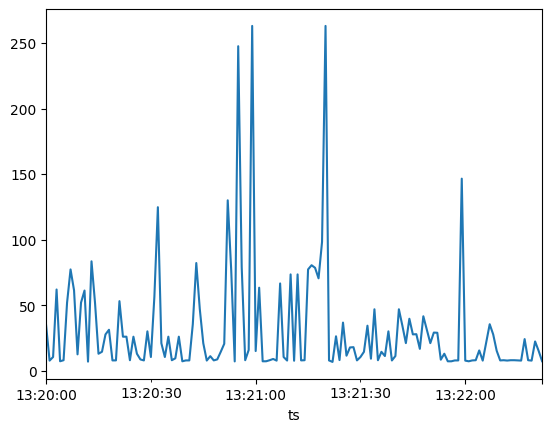

In [220]:
tdf["Fare"].plot()

<Axes: xlabel='ts'>

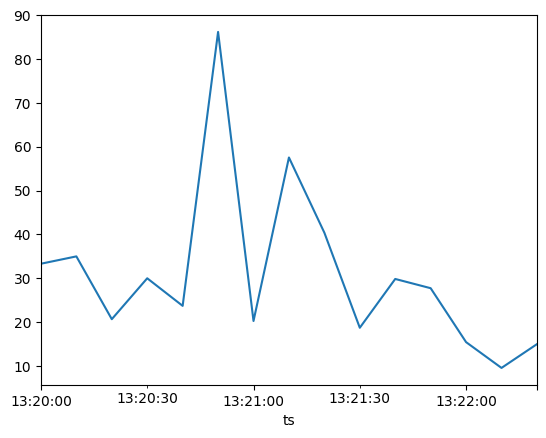

In [221]:
tdf["Fare"].resample("10s").mean().plot()

<Axes: >

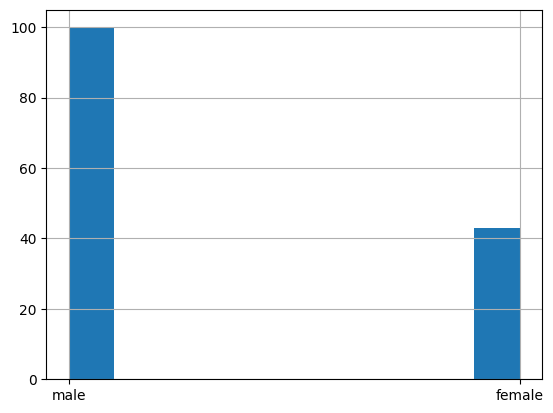

In [222]:
tdf["Sex"].hist()

In [ ]:
# !pip install polars

## [Polars](https://docs.pola.rs/)

Свежий фреймворк, приходящий на смену pandas, который работает быстрее

Основные причины, почему polars быстрее:

- Rust и отсутствие GIL: ядро на Rust, нет Python‑GIL, безопасная многопоточность; минимальный overhead интерпретатора.

- Ленивое выполнение с оптимизатором: projection pruning (берёт только нужные столбцы), predicate pushdown (фильтры как можно «ниже», вплоть до чтения файлов), слияние стадий, упрощение выражений, избегание лишних материализаций.

- Параллельные алгоритмы: groupby/join/sort/agg распараллелены (разделение на партиции, параллельные хэш‑джоины, параллельные сортировки и агрегаты).

- Эффективная работа с памятью: компактные типы, validity bitmap для null вместо NaN/объектов, dictionary/categorical кодирование; меньше памяти → лучше кэш → быстрее.
Строки и категориальные: UTF‑8 массивы Arrow без Python‑объектов; строковые и regex‑операции в Rust/SIMD.


Даже с pandas 2.x и pyarrow‑dtype отставание часто остаётся из‑за GIL, отсутствия ленивого оптимизатора и ограниченного параллелизма в ключевых операциях.

![Картинка](https://storage.imgbly.com/imgbly/eyMAsoKUly.png)

![Картинка](https://storage.imgbly.com/imgbly/JqpZvHXGpS.png)

In [223]:
import polars as pl

In [224]:
df = pl.read_csv("titanic.csv")

In [225]:
print(df) # эстетики для

shape: (156, 13)
┌─────────────┬──────────┬────────┬──────────────┬───┬────────────┬─────────┬───────┬──────────┐
│ PassengerId ┆ Survived ┆ Pclass ┆ Lname        ┆ … ┆ Ticket     ┆ Fare    ┆ Cabin ┆ Embarked │
│ ---         ┆ ---      ┆ ---    ┆ ---          ┆   ┆ ---        ┆ ---     ┆ ---   ┆ ---      │
│ i64         ┆ i64      ┆ i64    ┆ str          ┆   ┆ str        ┆ f64     ┆ str   ┆ str      │
╞═════════════╪══════════╪════════╪══════════════╪═══╪════════════╪═════════╪═══════╪══════════╡
│ 1           ┆ 0        ┆ 3      ┆ Braund       ┆ … ┆ A/5 21171  ┆ 7.25    ┆ null  ┆ S        │
│ 2           ┆ 1        ┆ 1      ┆ Cumings      ┆ … ┆ PC 17599   ┆ 71.2833 ┆ C85   ┆ C        │
│ 3           ┆ 1        ┆ 3      ┆ Heikkinen    ┆ … ┆ STON/O2.   ┆ 7.925   ┆ null  ┆ S        │
│             ┆          ┆        ┆              ┆   ┆ 3101282    ┆         ┆       ┆          │
│ 4           ┆ 1        ┆ 1      ┆ Futrelle     ┆ … ┆ 113803     ┆ 53.1    ┆ C123  ┆ S        │
│ 5          

In [226]:
df.head()

PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund""",""" Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings""",""" Mrs. John Bradley (Florence B…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen""",""" Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle""",""" Mrs. Jacques Heath (Lily May …","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen""",""" Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


#### Типы данных

In [228]:
df.describe() # с добавлением строковых типов

statistic,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,str,f64,f64,f64,str,f64,str,str
"""count""",156.0,156.0,156.0,"""156""","""156""","""156""",126.0,156.0,156.0,"""156""",156.0,"""31""","""155"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""","""0""",30.0,0.0,0.0,"""0""",0.0,"""125""","""1"""
"""mean""",78.5,0.346154,2.423077,null,null,null,28.141508,0.615385,0.397436,null,28.109587,null,null
"""std""",45.177428,0.477275,0.795459,null,null,null,14.61388,1.056235,0.870146,null,39.401047,null,null
"""min""",1.0,0.0,1.0,"""Ahlin""",""" Don. Manuel E""","""female""",0.83,0.0,0.0,"""110465""",6.75,"""A5""","""C"""
"""25%""",40.0,0.0,2.0,null,null,null,19.0,0.0,0.0,null,8.0292,null,null
"""50%""",79.0,0.0,3.0,null,null,null,26.0,0.0,0.0,null,14.4542,null,null
"""75%""",117.0,1.0,3.0,null,null,null,35.0,1.0,0.0,null,30.0708,null,null
"""max""",156.0,1.0,3.0,"""van Billiard""",""" Rev. Thomas Roussel Davids""","""male""",71.0,5.0,5.0,"""W.E.P. 5734""",263.0,"""G6""","""S"""


In [227]:
df['Lname'].dtype # Нет Object

String

#### pl.DataFrame | pl.Series

In [229]:
print(type(df))
print(type(df["Age"]))
print(type(df.select("Age")))
print(type(df.select("Age").to_series()))
# или аналогично
print(type(df.get_column("Age")))

<class 'polars.dataframe.frame.DataFrame'>
<class 'polars.series.series.Series'>
<class 'polars.dataframe.frame.DataFrame'>
<class 'polars.series.series.Series'>
<class 'polars.series.series.Series'>


#### Cовместимость с pandas

In [ ]:
# !pip install pyarrow

In [230]:
df_pandas = df.to_pandas()

df_reconverted = pl.from_pandas(df_pandas)

print(type(df_reconverted))

<class 'polars.dataframe.frame.DataFrame'>


### Null vs NaN

In [234]:
df = pl.DataFrame({
    "int_nulls": [1, None, 3],          # null для целых чисел
    "float_nulls": [1.0, None, 3.0],    # null для float
    "float_nans": [1.0, np.nan, 3.0]    # NaN (только для float)
})

print(df)


shape: (3, 3)
┌───────────┬─────────────┬────────────┐
│ int_nulls ┆ float_nulls ┆ float_nans │
│ ---       ┆ ---         ┆ ---        │
│ i64       ┆ f64         ┆ f64        │
╞═══════════╪═════════════╪════════════╡
│ 1         ┆ 1.0         ┆ 1.0        │
│ null      ┆ null        ┆ NaN        │
│ 3         ┆ 3.0         ┆ 3.0        │
└───────────┴─────────────┴────────────┘


In [235]:
print(df.fill_nan(-1.0))
print(df.fill_null(-2.0))

shape: (3, 3)
┌───────────┬─────────────┬────────────┐
│ int_nulls ┆ float_nulls ┆ float_nans │
│ ---       ┆ ---         ┆ ---        │
│ i64       ┆ f64         ┆ f64        │
╞═══════════╪═════════════╪════════════╡
│ 1         ┆ 1.0         ┆ 1.0        │
│ null      ┆ null        ┆ -1.0       │
│ 3         ┆ 3.0         ┆ 3.0        │
└───────────┴─────────────┴────────────┘
shape: (3, 3)
┌───────────┬─────────────┬────────────┐
│ int_nulls ┆ float_nulls ┆ float_nans │
│ ---       ┆ ---         ┆ ---        │
│ f64       ┆ f64         ┆ f64        │
╞═══════════╪═════════════╪════════════╡
│ 1.0       ┆ 1.0         ┆ 1.0        │
│ -2.0      ┆ -2.0        ┆ NaN        │
│ 3.0       ┆ 3.0         ┆ 3.0        │
└───────────┴─────────────┴────────────┘


In [236]:
df_filtered = df.filter(
    ~pl.col("float_nulls").is_null() & ~pl.col("float_nans").is_nan()
)
print(df_filtered)

shape: (2, 3)
┌───────────┬─────────────┬────────────┐
│ int_nulls ┆ float_nulls ┆ float_nans │
│ ---       ┆ ---         ┆ ---        │
│ i64       ┆ f64         ┆ f64        │
╞═══════════╪═════════════╪════════════╡
│ 1         ┆ 1.0         ┆ 1.0        │
│ 3         ┆ 3.0         ┆ 3.0        │
└───────────┴─────────────┴────────────┘


### Ленивые вычисления

In [237]:
df_schema = pl.read_parquet_schema("flights-1m.parquet")
df_schema

Schema([('FL_DATE', Date),
        ('DEP_DELAY', Int16),
        ('ARR_DELAY', Int16),
        ('AIR_TIME', Int16),
        ('DISTANCE', Int16),
        ('DEP_TIME', Float32),
        ('ARR_TIME', Float32)])

In [238]:
df_meta =pl.read_parquet_metadata("flights-1m.parquet")
df_meta


{'ARROW:schema': '/////6gFAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAOADAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAC4AwAABAAAAKsDAAB7ImluZGV4X2NvbHVtbnMiOiBbXSwgImNvbHVtbl9pbmRleGVzIjogW10sICJjb2x1bW5zIjogW3sibmFtZSI6ICJGTF9EQVRFIiwgImZpZWxkX25hbWUiOiAiRkxfREFURSIsICJwYW5kYXNfdHlwZSI6ICJkYXRlIiwgIm51bXB5X3R5cGUiOiAib2JqZWN0IiwgIm1ldGFkYXRhIjogbnVsbH0sIHsibmFtZSI6ICJERVBfREVMQVkiLCAiZmllbGRfbmFtZSI6ICJERVBfREVMQVkiLCAicGFuZGFzX3R5cGUiOiAiaW50MTYiLCAibnVtcHlfdHlwZSI6ICJpbnQxNiIsICJtZXRhZGF0YSI6IG51bGx9LCB7Im5hbWUiOiAiQVJSX0RFTEFZIiwgImZpZWxkX25hbWUiOiAiQVJSX0RFTEFZIiwgInBhbmRhc190eXBlIjogImludDE2IiwgIm51bXB5X3R5cGUiOiAiaW50MTYiLCAibWV0YWRhdGEiOiBudWxsfSwgeyJuYW1lIjogIkFJUl9USU1FIiwgImZpZWxkX25hbWUiOiAiQUlSX1RJTUUiLCAicGFuZGFzX3R5cGUiOiAiaW50MTYiLCAibnVtcHlfdHlwZSI6ICJpbnQxNiIsICJtZXRhZGF0YSI6IG51bGx9LCB7Im5hbWUiOiAiRElTVEFOQ0UiLCAiZmllbGRfbmFtZSI6ICJESVNUQU5DRSIsICJwYW5kYXNfdHlwZSI6ICJpbnQxNiIsICJudW1weV90eXBlIjogImludDE2IiwgIm1ldGFkYXRhIjogbnVsbH0sIHsibmFtZSI6ICJERVBfVElNRSIsIC

In [ ]:
pl.read
p

In [239]:
df_sample = pl.read_parquet("flights-1m.parquet", n_rows=1000)

In [240]:
df_sample.describe()

statistic,FL_DATE,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,DEP_TIME,ARR_TIME
str,str,f64,f64,f64,f64,f64,f64
"""count""","""1000""",1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2006-01-16 00:07:12""",4.622,1.465,314.103,2584.65,13.411866,13.851167
"""std""",null,25.140668,30.553728,81.41536,695.824479,4.962078,5.798705
"""min""","""2006-01-01""",-25.0,-50.0,73.0,802.0,0.0,0.033333
"""25%""","""2006-01-08""",-5.0,-15.0,279.0,2475.0,8.95,10.433333
"""50%""","""2006-01-16""",-2.0,-5.0,303.0,2475.0,11.966666,14.5
"""75%""","""2006-01-24""",2.0,9.0,345.0,2586.0,17.683332,18.716667
"""max""","""2006-01-31""",285.0,263.0,565.0,4244.0,23.983334,23.966667


### План запроса

In [241]:
lf = pl.scan_parquet("flights-1m.parquet").filter(pl.col("AIR_TIME") > 200).select(["AIR_TIME", "DISTANCE"])
print(lf.explain()) # для плана; collect(streaming=True) для потокового выполнения.

Parquet SCAN [flights-1m.parquet]
PROJECT 2/7 COLUMNS
SELECTION: [(col("AIR_TIME")) > (200)]


In [242]:
lf

In [244]:
# out = lf.collect(streaming=True)
out = lf.collect(engine="streaming")
print(out)

shape: (101_052, 2)
┌──────────┬──────────┐
│ AIR_TIME ┆ DISTANCE │
│ ---      ┆ ---      │
│ i16      ┆ i16      │
╞══════════╪══════════╡
│ 350      ┆ 2475     │
│ 343      ┆ 2475     │
│ 344      ┆ 2475     │
│ 331      ┆ 2475     │
│ 321      ┆ 2475     │
│ …        ┆ …        │
│ 286      ┆ 1747     │
│ 283      ┆ 1747     │
│ 331      ┆ 1946     │
│ 279      ┆ 1946     │
│ 307      ┆ 1946     │
└──────────┴──────────┘


In [256]:
out.sort(by="DISTANCE", descending=False)
print(out)

shape: (101_052, 2)
┌──────────┬──────────┐
│ AIR_TIME ┆ DISTANCE │
│ ---      ┆ ---      │
│ i16      ┆ i16      │
╞══════════╪══════════╡
│ 350      ┆ 2475     │
│ 343      ┆ 2475     │
│ 344      ┆ 2475     │
│ 331      ┆ 2475     │
│ 321      ┆ 2475     │
│ …        ┆ …        │
│ 286      ┆ 1747     │
│ 283      ┆ 1747     │
│ 331      ┆ 1946     │
│ 279      ┆ 1946     │
│ 307      ┆ 1946     │
└──────────┴──────────┘


### Expression API

In [257]:
# Генерация тестовых данных
df1 = pl.DataFrame({
    "id": [1, 2, 3, 4],
    "value": [5, 15, 8, 20],
    "category": ["A", "B", "A", "B"]
})

df2 = pl.DataFrame({
    "id": [1, 2, 3, 5],
    "extra_info": ["info1", "info2", "info3", "info4"]
})

# Запись в Parquet
df1.write_parquet("data1.parquet")
df2.write_parquet("data2.parquet")

# Чтение из Parquet
df1 = pl.read_parquet("data1.parquet")
df2 = pl.read_parquet("data2.parquet")


#### Фильтрация

In [258]:
filtered = df1.filter(pl.col("value") > 10)

#### Добавить колонку

In [259]:
new_col_df = df1.with_columns((pl.col("value") * 2).alias("value_double"))


In [260]:
print(new_col_df)

shape: (4, 4)
┌─────┬───────┬──────────┬──────────────┐
│ id  ┆ value ┆ category ┆ value_double │
│ --- ┆ ---   ┆ ---      ┆ ---          │
│ i64 ┆ i64   ┆ str      ┆ i64          │
╞═════╪═══════╪══════════╪══════════════╡
│ 1   ┆ 5     ┆ A        ┆ 10           │
│ 2   ┆ 15    ┆ B        ┆ 30           │
│ 3   ┆ 8     ┆ A        ┆ 16           │
│ 4   ┆ 20    ┆ B        ┆ 40           │
└─────┴───────┴──────────┴──────────────┘


#### Условная логика 

In [263]:
with_condition_df = df1.with_columns(
    size=pl.when(pl.col("value") > 10)
           .then(pl.lit("big")) # Иначе строка трактуется как Имя колонки
           .otherwise(pl.lit("small"))
)
print(with_condition_df)

shape: (4, 4)
┌─────┬───────┬──────────┬───────┐
│ id  ┆ value ┆ category ┆ size  │
│ --- ┆ ---   ┆ ---      ┆ ---   │
│ i64 ┆ i64   ┆ str      ┆ str   │
╞═════╪═══════╪══════════╪═══════╡
│ 1   ┆ 5     ┆ A        ┆ small │
│ 2   ┆ 15    ┆ B        ┆ big   │
│ 3   ┆ 8     ┆ A        ┆ small │
│ 4   ┆ 20    ┆ B        ┆ big   │
└─────┴───────┴──────────┴───────┘


### Оконные функции в Polars

Оконные функции позволяют выполнять вычисления над группами строк без группировки данных. Это мощный инструмент для аналитики данных.


In [264]:
# Создаем тестовые данные для демонстрации оконных функций
sales_data = pl.DataFrame({
    "employee": ["Alice", "Bob", "Alice", "Bob", "Alice", "Bob", "Alice", "Bob"],
    "department": ["Sales", "Sales", "Sales", "Sales", "Marketing", "Marketing", "Marketing", "Marketing"],
    "month": [1, 1, 2, 2, 1, 1, 2, 2],
    "sales": [1000, 1200, 1100, 1300, 800, 900, 850, 950]
})

print("Исходные данные:")
print(sales_data)


Исходные данные:
shape: (8, 4)
┌──────────┬────────────┬───────┬───────┐
│ employee ┆ department ┆ month ┆ sales │
│ ---      ┆ ---        ┆ ---   ┆ ---   │
│ str      ┆ str        ┆ i64   ┆ i64   │
╞══════════╪════════════╪═══════╪═══════╡
│ Alice    ┆ Sales      ┆ 1     ┆ 1000  │
│ Bob      ┆ Sales      ┆ 1     ┆ 1200  │
│ Alice    ┆ Sales      ┆ 2     ┆ 1100  │
│ Bob      ┆ Sales      ┆ 2     ┆ 1300  │
│ Alice    ┆ Marketing  ┆ 1     ┆ 800   │
│ Bob      ┆ Marketing  ┆ 1     ┆ 900   │
│ Alice    ┆ Marketing  ┆ 2     ┆ 850   │
│ Bob      ┆ Marketing  ┆ 2     ┆ 950   │
└──────────┴────────────┴───────┴───────┘


In [ ]:
# 1. RANK() - ранжирование по продажам в рамках каждого отдела
ranked_data = sales_data.with_columns([
    (pl
     .col("sales")
     .rank(descending=True)
     .over("department")
     .alias("rank_in_dept")),
    (pl
     .col("sales")
     .rank(method="dense")
     .over("department")
     .alias("dense_rank_in_dept"))
])

print("1. Ранжирование по продажам в рамках отдела:")
print(ranked_data)


1. Ранжирование по продажам в рамках отдела:
shape: (8, 6)
┌──────────┬────────────┬───────┬───────┬──────────────┬────────────────────┐
│ employee ┆ department ┆ month ┆ sales ┆ rank_in_dept ┆ dense_rank_in_dept │
│ ---      ┆ ---        ┆ ---   ┆ ---   ┆ ---          ┆ ---                │
│ str      ┆ str        ┆ i64   ┆ i64   ┆ f64          ┆ u32                │
╞══════════╪════════════╪═══════╪═══════╪══════════════╪════════════════════╡
│ Alice    ┆ Sales      ┆ 1     ┆ 1000  ┆ 4.0          ┆ 1                  │
│ Bob      ┆ Sales      ┆ 1     ┆ 1200  ┆ 2.0          ┆ 3                  │
│ Alice    ┆ Sales      ┆ 2     ┆ 1100  ┆ 3.0          ┆ 2                  │
│ Bob      ┆ Sales      ┆ 2     ┆ 1300  ┆ 1.0          ┆ 4                  │
│ Alice    ┆ Marketing  ┆ 1     ┆ 800   ┆ 4.0          ┆ 1                  │
│ Bob      ┆ Marketing  ┆ 1     ┆ 900   ┆ 2.0          ┆ 3                  │
│ Alice    ┆ Marketing  ┆ 2     ┆ 850   ┆ 3.0          ┆ 2                  │
│ Bob

In [266]:
# 4. LAG() и LEAD() - предыдущие и следующие значения
lag_lead = sales_data.sort(["department", "month"]).with_columns([
    pl.col("sales").shift(1).over("department").alias("prev_sales"),
    pl.col("sales").shift(-1).over("department").alias("next_sales"),
    (pl.col("sales") - pl.col("sales").shift(1)).over("department").alias("sales_change")
])

print("4. LAG и LEAD функции:")
print(lag_lead)


4. LAG и LEAD функции:
shape: (8, 7)
┌──────────┬────────────┬───────┬───────┬────────────┬────────────┬──────────────┐
│ employee ┆ department ┆ month ┆ sales ┆ prev_sales ┆ next_sales ┆ sales_change │
│ ---      ┆ ---        ┆ ---   ┆ ---   ┆ ---        ┆ ---        ┆ ---          │
│ str      ┆ str        ┆ i64   ┆ i64   ┆ i64        ┆ i64        ┆ i64          │
╞══════════╪════════════╪═══════╪═══════╪════════════╪════════════╪══════════════╡
│ Alice    ┆ Marketing  ┆ 1     ┆ 800   ┆ null       ┆ 900        ┆ null         │
│ Bob      ┆ Marketing  ┆ 1     ┆ 900   ┆ 800        ┆ 850        ┆ 100          │
│ Alice    ┆ Marketing  ┆ 2     ┆ 850   ┆ 900        ┆ 950        ┆ -50          │
│ Bob      ┆ Marketing  ┆ 2     ┆ 950   ┆ 850        ┆ null       ┆ 100          │
│ Alice    ┆ Sales      ┆ 1     ┆ 1000  ┆ null       ┆ 1200       ┆ null         │
│ Bob      ┆ Sales      ┆ 1     ┆ 1200  ┆ 1000       ┆ 1100       ┆ 200          │
│ Alice    ┆ Sales      ┆ 2     ┆ 1100  ┆ 1200    

#### Комплексный пример Expression API в Polars


In [267]:
# 1. Создание и загрузка данных
import polars as pl
import numpy as np
from datetime import datetime, timedelta

# Генерируем реалистичные данные о продажах
np.random.seed(42)
n_records = 1000

# Создаем данные о продажах
sales_data = pl.DataFrame({
    "sale_id": range(1, n_records + 1),
    "employee_id": np.random.randint(1, 21, n_records),
    "employee_name": [f"Employee_{i:02d}" for i in np.random.randint(1, 21, n_records)],
    "department": np.random.choice(["Sales", "Marketing", "Support", "Development"], n_records),
    "region": np.random.choice(["North", "South", "East", "West"], n_records),
    "product_category": np.random.choice(["Electronics", "Clothing", "Books", "Home"], n_records),
    "sale_date": [(datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365))).strftime("%Y-%m-%d") 
                  for _ in range(n_records)],
    "quantity": np.random.randint(1, 10, n_records),
    "unit_price": np.round(np.random.uniform(10, 500, n_records), 2),
    "discount_percent": np.random.uniform(0, 30, n_records),
    "customer_rating": np.random.uniform(1, 5, n_records),
    "is_premium_customer": np.random.choice([True, False], n_records, p=[0.3, 0.7])
})

# Вычисляем общую сумму продажи
sales_data = sales_data.with_columns([
    (pl.col("quantity") * pl.col("unit_price")).alias("gross_amount"),
    (pl.col("quantity") * pl.col("unit_price") * (1 - pl.col("discount_percent") / 100)).alias("net_amount")
])

print("Исходные данные:")
print(f"Размер датафрейма: {sales_data.shape}")
print(sales_data.head(10))
    

Исходные данные:
Размер датафрейма: (1000, 14)
shape: (10, 14)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ sale_id ┆ employee_i ┆ employee_ ┆ departmen ┆ … ┆ customer_ ┆ is_premiu ┆ gross_amo ┆ net_amoun │
│ ---     ┆ d          ┆ name      ┆ t         ┆   ┆ rating    ┆ m_custome ┆ unt       ┆ t         │
│ i64     ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ r         ┆ ---       ┆ ---       │
│         ┆ i64        ┆ str       ┆ str       ┆   ┆ f64       ┆ ---       ┆ f64       ┆ f64       │
│         ┆            ┆           ┆           ┆   ┆           ┆ bool      ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ 7          ┆ Employee_ ┆ Support   ┆ … ┆ 3.716687  ┆ true      ┆ 515.2     ┆ 410.98118 │
│         ┆            ┆ 07        ┆           ┆   ┆           ┆           ┆           ┆ 5         │
│ 2       ┆ 20         ┆ Emp

In [268]:

# Создаем дополнительные данные для джойнов
employee_info = pl.DataFrame({
    "employee_id": range(1, 21),
    "hire_date": [(datetime(2023, 1, 1) - timedelta(days=np.random.randint(30, 365))).strftime("%Y-%m-%d") 
                  for _ in range(20)],
    "salary": np.random.randint(50000, 150000, 20),
    "manager_id": np.random.choice([1, 2, 3, 4, 5], 20),
    "experience_years": np.random.randint(1, 15, 20),
    "is_senior": np.random.choice([True, False], 20, p=[0.3, 0.7])
})

product_info = pl.DataFrame({
    "product_category": ["Electronics", "Clothing", "Books", "Home"],
    "category_margin": [0.25, 0.40, 0.15, 0.30],
    "seasonal_factor": [1.2, 0.8, 1.0, 1.1],
    "target_audience": ["Tech", "Fashion", "Education", "Lifestyle"]
})

# ОСНОВНОЙ МЕГА-ПАЙПЛАЙН
result = (
    sales_data
    # 1. ОБРАБОТКА ДАТ И ВРЕМЕННЫХ ПРИЗНАКОВ
    .with_columns([
        pl.col("sale_date").str.to_date().alias("sale_date_parsed"),
        pl.col("sale_date").str.to_date().dt.year().alias("year"),
        pl.col("sale_date").str.to_date().dt.month().alias("month"),
        pl.col("sale_date").str.to_date().dt.weekday().alias("weekday"),
        pl.col("sale_date").str.to_date().dt.quarter().alias("quarter"),
        pl.when(pl.col("sale_date").str.to_date().dt.weekday() <= 5)
            .then(pl.lit("Weekday")).otherwise(pl.lit("Weekend")).alias("day_type"),
        pl.when(pl.col("sale_date").str.to_date().dt.month().is_in([12, 1, 2]))
            .then(pl.lit("Winter"))
            .when(pl.col("sale_date").str.to_date().dt.month().is_in([3, 4, 5]))
            .then(pl.lit("Spring"))
            .when(pl.col("sale_date").str.to_date().dt.month().is_in([6, 7, 8]))
            .then(pl.lit("Summer"))
            .otherwise(pl.lit("Fall")).alias("season")
    ])
    
    # 2. ВЫЧИСЛЕНИЕ ПРОИЗВОДНЫХ КОЛОНОК
    .with_columns([
        (pl.col("quantity") * pl.col("unit_price")).alias("gross_amount"),
        (pl.col("quantity") * pl.col("unit_price") * (1 - pl.col("discount_percent") / 100)).alias("net_amount"),
        (pl.col("quantity") * pl.col("unit_price") * pl.col("discount_percent") / 100).alias("discount_amount"),
        (pl.col("net_amount") - pl.col("gross_amount") * 0.1).alias("estimated_profit"),
        (pl.col("quantity") * pl.col("customer_rating")).alias("quantity_rating_score")
    ])
    
    # 3. КАТЕГОРИЗАЦИЯ И БИНАРНЫЕ ПРИЗНАКИ
    .with_columns([
        pl.when(pl.col("net_amount") < 100).then(pl.lit("Small"))
            .when(pl.col("net_amount") < 500).then(pl.lit("Medium"))
            .when(pl.col("net_amount") < 1000).then(pl.lit("Large"))
            .otherwise(pl.lit("Very Large")).alias("sale_size_category"),
        
        pl.when(pl.col("customer_rating") >= 4.5).then(pl.lit("Excellent"))
            .when(pl.col("customer_rating") >= 3.5).then(pl.lit("Good"))
            .when(pl.col("customer_rating") >= 2.5).then(pl.lit("Average"))
            .otherwise(pl.lit("Poor")).alias("customer_rating_category"),
        
        (pl.col("net_amount") > pl.col("net_amount").mean()).alias("above_average_sale"),
        (pl.col("customer_rating") > 4.0).alias("high_rating_customer"),
        (pl.col("discount_percent") > 15.0).alias("high_discount_sale"),
        (pl.col("quantity") > pl.col("quantity").quantile(0.8)).alias("high_quantity_sale")
    ])
    
    # 4. ОКОННЫЕ ФУНКЦИИ ДЛЯ АНАЛИТИКИ
    .with_columns([
        # Ранжирование
        pl.col("net_amount").rank(descending=True).over("employee_id").alias("employee_sale_rank"),
        pl.col("net_amount").rank(descending=True).over("department").alias("department_sale_rank"),
        pl.col("net_amount").rank(descending=True).over("region").alias("region_sale_rank"),
        
        # Агрегаты по группам
        pl.col("net_amount").mean().over("department").alias("dept_avg_sale"),
        pl.col("net_amount").sum().over("region").alias("region_total_sales"),
        pl.col("customer_rating").mean().over("department").alias("dept_avg_rating"),
        pl.col("quantity").sum().over("employee_id").alias("employee_total_quantity"),
        
        # Проценты
        (pl.col("net_amount") / pl.col("net_amount").sum().over("region") * 100).alias("pct_of_region_sales"),
        (pl.col("net_amount") / pl.col("net_amount").sum().over("department") * 100).alias("pct_of_dept_sales"),
        
        # Накопительные функции
        pl.col("net_amount").cum_sum().over("employee_id").alias("employee_cumulative_sales"),
        pl.col("quantity").cum_sum().over("department").alias("dept_cumulative_quantity"),
        
        # LAG/LEAD функции
        pl.col("net_amount").shift(1).over("employee_id").alias("prev_sale_amount"),
        (pl.col("net_amount") - pl.col("net_amount").shift(1)).over("employee_id").alias("sale_change"),
        ((pl.col("net_amount") - pl.col("net_amount").shift(1)) / pl.col("net_amount").shift(1) * 100).over("employee_id").alias("sale_change_pct"),
        
        # Скользящие окна
        pl.col("net_amount").rolling_mean(window_size=3).over("employee_id").alias("employee_rolling_avg_3"),
        pl.col("customer_rating").rolling_std(window_size=5).over("department").alias("dept_rating_std_5")
    ])
    
    # 5. ДЖОЙН С ДОПОЛНИТЕЛЬНЫМИ ДАННЫМИ
    .join(employee_info, on="employee_id", how="left")
    .join(product_info, on="product_category", how="left")
    
    # 6. ДОПОЛНИТЕЛЬНЫЕ ВЫЧИСЛЕНИЯ ПОСЛЕ ДЖОЙНА
    .with_columns([
        # Прибыль с учетом маржи категории
        (pl.col("net_amount") * pl.col("category_margin")).alias("category_profit"),
        
        # Сезонный коэффициент
        (pl.col("net_amount") * pl.col("seasonal_factor")).alias("seasonal_adjusted_sales"),
        
        # Опыт сотрудника влияет на продажи
        (pl.col("net_amount") * (1 + pl.col("experience_years") * 0.02)).alias("experience_adjusted_sales"),
        
        # Комбинированный рейтинг
        (pl.col("customer_rating") * pl.col("quantity") * pl.col("experience_years") / 10).alias("combined_rating"),
        
        # Эффективность скидки
        (pl.col("discount_percent") / pl.col("net_amount") * 1000).alias("discount_efficiency"),
        
        # Относительная производительность
        (pl.col("net_amount") / pl.col("dept_avg_sale") * 100).alias("performance_vs_dept_avg"),
        (pl.col("net_amount") / pl.col("region_total_sales") * 100).alias("performance_vs_region_total")
    ])
    
    # 7. СЛОЖНАЯ ФИЛЬТРАЦИЯ
    .filter(
        (pl.col("net_amount") > 50) &  # Минимальная сумма продажи
        (pl.col("customer_rating") >= 2.0) &  # Минимальный рейтинг
        (pl.col("sale_date_parsed") >= pl.lit("2023-01-01").str.to_date()) &  # Дата после начала года
        (pl.col("discount_percent") <= 50)  # Максимальная скидка
    )
    
    # 8. ГРУППИРОВКА И АГРЕГАЦИЯ
    .group_by(["department", "region", "quarter"]).agg([
        # Основные метрики
        pl.col("net_amount").sum().alias("total_sales"),
        pl.col("net_amount").mean().alias("avg_sale"),
        pl.col("net_amount").median().alias("median_sale"),
        pl.col("net_amount").std().alias("sales_std"),
        pl.col("net_amount").min().alias("min_sale"),
        pl.col("net_amount").max().alias("max_sale"),
        
        # Количественные метрики
        pl.col("sale_id").count().alias("total_transactions"),
        pl.col("employee_id").n_unique().alias("unique_employees"),
        pl.col("quantity").sum().alias("total_quantity"),
        pl.col("quantity").mean().alias("avg_quantity"),
        
        # Рейтинги и качество
        pl.col("customer_rating").mean().alias("avg_customer_rating"),
        pl.col("customer_rating").std().alias("rating_std"),
        pl.col("high_rating_customer").sum().alias("high_rating_count"),
        
        # Процентные метрики
        (pl.col("above_average_sale").sum() / pl.col("above_average_sale").count() * 100).alias("pct_above_avg_sales"),
        (pl.col("high_discount_sale").sum() / pl.col("high_discount_sale").count() * 100).alias("pct_high_discount"),
        
        # Временные метрики
        pl.col("sale_date_parsed").min().alias("first_sale_date"),
        pl.col("sale_date_parsed").max().alias("last_sale_date"),
        
        # Скидки
        pl.col("discount_percent").mean().alias("avg_discount"),
        pl.col("discount_amount").sum().alias("total_discount_given"),
        
        # Прибыльность
        pl.col("estimated_profit").sum().alias("total_estimated_profit"),
        pl.col("category_profit").sum().alias("total_category_profit"),
        
        # Производительность
        pl.col("performance_vs_dept_avg").mean().alias("avg_performance_vs_dept"),
        pl.col("employee_sale_rank").mean().alias("avg_employee_rank"),
        
        # Опыт сотрудников
        pl.col("experience_years").mean().alias("avg_experience"),
        pl.col("is_senior").sum().alias("senior_employees_count")
    ])
    
    # 9. ДОПОЛНИТЕЛЬНЫЕ ВЫЧИСЛЕНИЯ ПОСЛЕ ГРУППИРОВКИ
    .with_columns([
        # Эффективность отдела
        (pl.col("total_sales") / pl.col("unique_employees")).alias("sales_per_employee"),
        (pl.col("total_quantity") / pl.col("unique_employees")).alias("quantity_per_employee"),
        
        # Качество продаж
        (pl.col("high_rating_count") / pl.col("total_transactions") * 100).alias("pct_high_rating_transactions"),
        
        # Эффективность скидок
        (pl.col("total_discount_given") / pl.col("total_sales") * 100).alias("discount_impact_pct"),
        
        # Прибыльность
        (pl.col("total_estimated_profit") / pl.col("total_sales") * 100).alias("profit_margin_pct"),
        (pl.col("total_category_profit") / pl.col("total_sales") * 100).alias("category_profit_margin"),
        
        # Стабильность продаж
        (pl.col("sales_std") / pl.col("avg_sale") * 100).alias("sales_volatility_pct"),
        
        # Опыт команды
        (pl.col("senior_employees_count") / pl.col("unique_employees") * 100).alias("pct_senior_employees"),
        
    ])
    .with_columns([
                # Комбинированный рейтинг отдела
        (pl.col("avg_performance_vs_dept") * pl.col("pct_high_rating_transactions") / 100).alias("department_quality_score")
    ])
    
    # 10. ФИНАЛЬНАЯ СОРТИРОВКА И ОТБОР КОЛОНОК
    .sort(["department", "total_sales"], descending=[False, True])
    .select([
        "department", "region", "quarter",
        "total_sales", "avg_sale", "sales_per_employee", "quantity_per_employee",
        "avg_customer_rating", "pct_high_rating_transactions", "department_quality_score",
        "avg_discount", "discount_impact_pct", "profit_margin_pct",
        "avg_experience", "pct_senior_employees", "sales_volatility_pct",
        "total_transactions", "unique_employees", "first_sale_date", "last_sale_date"
    ])
)


print("\nСтатистика по отделам:")

print(result.group_by("department").agg([
    pl.col("total_sales").sum().alias("grand_total_sales"),
    pl.col("sales_per_employee").mean().alias("avg_sales_per_employee"),
    pl.col("department_quality_score").mean().alias("avg_quality_score")
]).sort("grand_total_sales", descending=True))



Статистика по отделам:
shape: (4, 4)
┌─────────────┬───────────────────┬────────────────────────┬───────────────────┐
│ department  ┆ grand_total_sales ┆ avg_sales_per_employee ┆ avg_quality_score │
│ ---         ┆ ---               ┆ ---                    ┆ ---               │
│ str         ┆ f64               ┆ f64                    ┆ f64               │
╞═════════════╪═══════════════════╪════════════════════════╪═══════════════════╡
│ Development ┆ 227925.500576     ┆ 1520.767881            ┆ 34.084631         │
│ Sales       ┆ 214328.231741     ┆ 1615.261894            ┆ 27.42635          │
│ Marketing   ┆ 204837.072372     ┆ 1483.875177            ┆ 31.130196         │
│ Support     ┆ 164840.202436     ┆ 1263.490208            ┆ 31.725111         │
└─────────────┴───────────────────┴────────────────────────┴───────────────────┘


#### Добавить номер строки

<div class="alert alert-warning">
    <b>Важно! Порядок строк не гарантирован. При необходимости - заказывать sort</b>
</div>

In [269]:
result.with_row_count("row_nr")

/var/folders/4m/4cskytjn019fn68ytvs204bwkhjl6b/T/ipykernel_61102/752244727.py:1: DeprecationWarning: `DataFrame.with_row_count` is deprecated; use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  result.with_row_count("row_nr")


row_nr,department,region,quarter,total_sales,avg_sale,sales_per_employee,quantity_per_employee,avg_customer_rating,pct_high_rating_transactions,department_quality_score,avg_discount,discount_impact_pct,profit_margin_pct,avg_experience,pct_senior_employees,sales_volatility_pct,total_transactions,unique_employees,first_sale_date,last_sale_date
u32,str,str,i8,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32,u32,date,date
0,"""Development""","""West""",1,22081.823126,1298.930772,1840.151927,8.333333,3.442841,35.294118,43.028326,13.18492,12.487451,88.751255,6.117647,66.666667,81.039835,17,12,2023-01-17,2023-03-31
1,"""Development""","""West""",2,20838.923435,1389.261562,2315.435937,9.444444,3.45034,26.666667,34.771135,12.882297,14.986602,88.50134,5.333333,55.555556,74.753039,15,9,2023-04-16,2023-06-23
2,"""Development""","""North""",4,20198.181407,1346.545427,1683.181784,7.166667,3.533423,33.333333,42.127518,13.040407,10.439052,88.956095,5.133333,58.333333,80.747948,15,12,2023-10-03,2023-12-30
3,"""Development""","""North""",3,16547.992489,1378.999374,2068.499061,9.125,3.710707,33.333333,43.14286,12.554779,16.198445,88.380155,9.916667,12.5,85.382794,12,8,2023-07-01,2023-09-22
4,"""Development""","""East""",2,15535.512983,1553.551298,1553.551298,6.4,3.22949,20.0,29.162296,14.701219,20.617453,87.938255,7.9,40.0,69.953451,10,10,2023-04-06,2023-06-28
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
59,"""Support""","""South""",4,8160.57546,816.057546,1020.071932,6.0,4.096309,50.0,39.229946,15.609338,14.644856,88.535514,8.1,62.5,124.547128,10,8,2023-10-21,2023-12-11
60,"""Support""","""North""",1,6700.948907,837.618613,1340.189781,7.0,3.369923,12.5,10.06661,13.253284,16.086096,88.39139,8.625,60.0,90.953657,8,5,2023-01-13,2023-03-29
61,"""Support""","""North""",3,5079.035071,564.33723,634.879384,5.125,3.66167,55.555556,30.143461,15.17409,19.210242,88.078976,8.111111,25.0,83.871859,9,8,2023-07-12,2023-09-23


### Управление потоками в polars: POLARS_MAX_THREADS

In [270]:
import os
import time
import psutil
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import polars as pl
import numpy as np

# Создаем большой датафрейм для тестирования
print("=== СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ PANDAS VS POLARS ===\n")

# Генерируем тестовые данные
n_rows = 10_000_000  # Уменьшаем для более быстрого тестирования
df_polars = pl.DataFrame({
    "id": range(n_rows),
    "category": [f"cat_{i % 100}" for i in range(n_rows)],
    "value": [i * 1.5 + (i % 7) * 10 for i in range(n_rows)],
    "group": [f"group_{i % 50}" for i in range(n_rows)],
    "score": [i % 1000 / 1000.0 for i in range(n_rows)]
})

# Создаем аналогичный DataFrame для Pandas
df_pandas = pd.DataFrame({
    "id": range(n_rows),
    "category": [f"cat_{i % 100}" for i in range(n_rows)],
    "value": [i * 1.5 + (i % 7) * 10 for i in range(n_rows)],
    "group": [f"group_{i % 50}" for i in range(n_rows)],
    "score": [i % 1000 / 1000.0 for i in range(n_rows)]
})

print(f"Размер тестового датафрейма: {df_polars.shape}")
print(f"Количество доступных CPU ядер: {psutil.cpu_count()}")
print(f"Текущее значение POLARS_MAX_THREADS: {os.environ.get('POLARS_MAX_THREADS', 'Не установлено')}\n")

# Функция для измерения времени выполнения
def measure_time(func, description):
    start_time = time.time()
    result = func()
    end_time = time.time()
    duration = end_time - start_time
    print(f"{description}: {duration:.3f} секунд")
    return result, duration

# Тестируем разные настройки потоков для Polars
thread_configs = [1, 4, 12]  # None = использовать все доступные ядра
results = {}

print("=== ТЕСТИРОВАНИЕ POLARS С РАЗНЫМИ НАСТРОЙКАМИ ПОТОКОВ ===")

for threads in thread_configs:
    print(f"\n--- Polars с {threads if threads else 'всеми'} потоками ---")
    
    # Устанавливаем количество потоков
    if threads:
        os.environ['POLARS_MAX_THREADS'] = str(threads)
    else:
        os.environ.pop('POLARS_MAX_THREADS', None)
    
    # Пересоздаем датафрейм для чистого теста
    df_test = df_polars.clone()
    
    # Тест 1: Группировка и агрегация
    def polars_groupby_test():
        return df_test.group_by("category").agg([
            pl.col("value").sum().alias("total_value"),
            pl.col("value").mean().alias("avg_value"),
            pl.col("value").std().alias("std_value"),
            pl.col("score").max().alias("max_score"),
            pl.col("id").count().alias("count")
        ])
    
    # Тест 2: Сложные вычисления
    def polars_complex_test():
        return df_test.with_columns([
            (pl.col("value") * pl.col("score")).alias("value_score"),
            pl.col("value").rank().over("category").alias("rank_in_category"),
            pl.col("value").mean().over("group").alias("group_avg"),
            (pl.col("value") - pl.col("value").mean()).alias("value_diff"),
            pl.col("value").rolling_mean(window_size=100).alias("rolling_avg")
        ])
    
    # Тест 3: Фильтрация и сортировка
    def polars_filter_sort_test():
        return (df_test
                .filter(pl.col("value") > 1000)
                .sort(["category", "value"], descending=[False, True])
                .with_columns([
                    pl.col("value").cum_sum().over("category").alias("cumsum_category"),
                    pl.col("value").shift(1).over("category").alias("prev_value")
                ])
               )
    
    # Выполняем тесты Polars
    groupby_result, groupby_time = measure_time(polars_groupby_test, "Polars группировка")
    complex_result, complex_time = measure_time(polars_complex_test, "Polars сложные вычисления")
    filter_result, filter_time = measure_time(polars_filter_sort_test, "Polars фильтрация и сортировка")
    
    total_time = groupby_time + complex_time + filter_time
    results[f'polars_{threads or "all"}'] = {
        'groupby': groupby_time,
        'complex': complex_time,
        'filter': filter_time,
        'total': total_time
    }
    
    print(f"Общее время Polars: {total_time:.3f} секунд")

# Тестируем Pandas
print("\n=== ТЕСТИРОВАНИЕ PANDAS ===")

def pandas_groupby_test():
    return df_pandas.groupby('category').agg({
        'value': ['sum', 'mean', 'std', 'count'],
        'score': 'max'
    }).round(4)

def pandas_complex_test():
    df_copy = df_pandas.copy()
    df_copy['value_score'] = df_copy['value'] * df_copy['score']
    df_copy['rank_in_category'] = df_copy.groupby('category')['value'].rank()
    df_copy['group_avg'] = df_copy.groupby('group')['value'].transform('mean')
    df_copy['value_diff'] = df_copy['value'] - df_copy['value'].mean()
    df_copy['rolling_avg'] = df_copy['value'].rolling(window=100, min_periods=1).mean()
    return df_copy

def pandas_filter_sort_test():
    filtered = df_pandas[df_pandas['value'] > 1000].copy()
    filtered = filtered.sort_values(['category', 'value'], ascending=[True, False])
    filtered['cumsum_category'] = filtered.groupby('category')['value'].cumsum()
    filtered['prev_value'] = filtered.groupby('category')['value'].shift(1)
    return filtered

# Выполняем тесты Pandas
pandas_groupby_result, pandas_groupby_time = measure_time(pandas_groupby_test, "Pandas группировка")
pandas_complex_result, pandas_complex_time = measure_time(pandas_complex_test, "Pandas сложные вычисления")
pandas_filter_result, pandas_filter_time = measure_time(pandas_filter_sort_test, "Pandas фильтрация и сортировка")

pandas_total_time = pandas_groupby_time + pandas_complex_time + pandas_filter_time
results['pandas'] = {
    'groupby': pandas_groupby_time,
    'complex': pandas_complex_time,
    'filter': pandas_filter_time,
    'total': pandas_total_time
}

print(f"Общее время Pandas: {pandas_total_time:.3f} секунд")

# Анализ результатов
print("\n=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ ===")
print("Библиотека | Потоки | Группировка | Сложные вычисления | Фильтрация | Общее время")
print("-" * 85)

for lib_name, times in results.items():
    if 'polars' in lib_name:
        threads = lib_name.split('_')[1]
        lib_display = f"Polars ({threads})"
    else:
        lib_display = "Pandas"
    
    print(f"{lib_display:10} | {str(threads if 'polars' in lib_name else '-'):6} | {times['groupby']:10.3f} | {times['complex']:17.3f} | {times['filter']:9.3f} | {times['total']:11.3f}")

# Находим лучшую конфигурацию
best_polars = min([(k, v) for k, v in results.items() if 'polars' in k], key=lambda x: x[1]['total'])
pandas_time = results['pandas']['total']

print(f"\nЛучшая конфигурация Polars: {best_polars[0]} (время: {best_polars[1]['total']:.3f} сек)")
print(f"Pandas время: {pandas_time:.3f} сек")

# Вычисляем ускорение
speedup = pandas_time / best_polars[1]['total']
print(f"Ускорение Polars vs Pandas: {speedup:.2f}x")

# Детальное сравнение по операциям
print(f"\n=== ДЕТАЛЬНОЕ СРАВНЕНИЕ ПО ОПЕРАЦИЯМ ===")
print("Операция | Pandas | Polars (лучший) | Ускорение")
print("-" * 50)

operations = ['groupby', 'complex', 'filter']
for op in operations:
    pandas_time = results['pandas'][op]
    polars_time = best_polars[1][op]
    speedup = pandas_time / polars_time
    print(f"{op:8} | {pandas_time:6.3f} | {polars_time:13.3f} | {speedup:8.2f}x")

# Демонстрация управления потоками в коде
print("\n=== УПРАВЛЕНИЕ ПОТОКАМИ В POLARS ===")

# Способ 1: Через переменную окружения
os.environ['POLARS_MAX_THREADS'] = '4'
print("Установлено 4 потока через os.environ")

# Способ 2: Через конфигурацию Polars
pl.Config.set_streaming_chunk_size(10000)  # Размер чанка для стриминга
print("Настроен размер чанка для стриминга")

# Способ 3: Использование стриминга для больших данных
print("\n--- Тест стриминга Polars ---")
def streaming_test():
    # Создаем ленивый запрос
    lazy_df = df_polars.lazy()
    
    # Сложный запрос с группировкой
    result = (lazy_df
              .filter(pl.col("value") > 100)
              .group_by("category")
              .agg([
                  pl.col("value").sum().alias("total"),
                  pl.col("value").mean().alias("avg"),
                  pl.col("value").std().alias("std")
              ])
              .sort("total", descending=True)
             )
    
    # Выполняем с стримингом
    return result.collect(engine="streaming")

streaming_result, streaming_time = measure_time(streaming_test, "Polars стриминг запрос")

# Рекомендации по настройке
print("\n=== РЕКОМЕНДАЦИИ ПО ВЫБОРУ БИБЛИОТЕКИ ===")
print("✓ Используйте Polars когда:")
print("  - Работаете с большими данными (>1M строк)")
print("  - Нужна максимальная производительность")
print("  - Выполняете сложные группировки и агрегации")
print("  - Важна экономия памяти")
print()
print("✓ Используйте Pandas когда:")
print("  - Работаете с небольшими данными (<100K строк)")
print("  - Нужна совместимость с существующим кодом")
print("  - Используете много библиотек, зависящих от Pandas")
print("  - Нужны специфические функции Pandas")
print()
print("✓ Настройки Polars:")
print("  - Для CPU-интенсивных задач: POLARS_MAX_THREADS = количество CPU ядер")
print("  - Для I/O-интенсивных задач: POLARS_MAX_THREADS = количество ядер * 2-4")
print("  - Для малых датафреймов: POLARS_MAX_THREADS = 1-2 (избежать overhead)")
print("  - Для больших датафреймов: используйте стриминг (streaming=True)")

# Сброс настроек
os.environ.pop('POLARS_MAX_THREADS', None)
print(f"\nНастройки сброшены. Текущее значение: {os.environ.get('POLARS_MAX_THREADS', 'По умолчанию')}")

=== СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ PANDAS VS POLARS ===

Размер тестового датафрейма: (10000000, 5)
Количество доступных CPU ядер: 12
Текущее значение POLARS_MAX_THREADS: Не установлено

=== ТЕСТИРОВАНИЕ POLARS С РАЗНЫМИ НАСТРОЙКАМИ ПОТОКОВ ===

--- Polars с 1 потоками ---
Polars группировка: 0.135 секунд
Polars сложные вычисления: 0.520 секунд
Polars фильтрация и сортировка: 1.120 секунд
Общее время Polars: 1.774 секунд

--- Polars с 4 потоками ---
Polars группировка: 0.108 секунд
Polars сложные вычисления: 0.512 секунд
Polars фильтрация и сортировка: 1.071 секунд
Общее время Polars: 1.690 секунд

--- Polars с 12 потоками ---
Polars группировка: 0.108 секунд
Polars сложные вычисления: 0.493 секунд
Polars фильтрация и сортировка: 0.976 секунд
Общее время Polars: 1.576 секунд

=== ТЕСТИРОВАНИЕ PANDAS ===
Pandas группировка: 0.435 секунд
Pandas сложные вычисления: 2.958 секунд
Pandas фильтрация и сортировка: 8.923 секунд
Общее время Pandas: 12.317 секунд

=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИ

### [Polars](https://docs.pola.rs/api/python/stable/reference/index.html) && [DuckDB](https://duckdb.org/docs/stable/)

#### Зачем нужен DuckDB

* Развесистые SQL запросы (WITH RECURSIVE)
* Большие "звездные" схемы, оптимизация join-ов
* Нативный стриминг, когда данные больше ОЗУ
* SQL понятный аналитикам
* Ускорение Pandas. Совместимость с Arrow / Polars

In [ ]:
# !pip install duckdb

In [271]:
import polars as pl
import duckdb
# import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

print("=== ИНТЕГРАЦИЯ POLARS С DUCKDB ===\n")

# 1. СОЗДАНИЕ ТЕСТОВЫХ ДАННЫХ В POLARS
print("1. Создание тестовых данных в Polars...")

# Генерируем данные о продажах
np.random.seed(42)
n_records = 100_000

sales_data = pl.DataFrame({
    "sale_id": range(1, n_records + 1),
    "employee_id": np.random.randint(1, 101, n_records),
    "customer_id": np.random.randint(1, 1001, n_records),
    "product_id": np.random.randint(1, 201, n_records),
    "category": np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], n_records),
    "region": np.random.choice(["North", "South", "East", "West", "Central"], n_records),
    "sale_date": [(datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365))).strftime("%Y-%m-%d") 
                  for _ in range(n_records)],
    "quantity": np.random.randint(1, 11, n_records),
    "unit_price": np.round(np.random.uniform(10, 1000, n_records), 2),
    "discount": np.random.uniform(0, 30, n_records),
    "rating": np.random.uniform(1, 5, n_records)
}).with_columns([
    (pl.col("quantity") * pl.col("unit_price") * (1 - pl.col("discount") / 100)).alias("total_amount")
])

print(f"Создан датафрейм Polars: {sales_data.shape}")
print(sales_data.head())

# 2. ПРЯМАЯ ИНТЕГРАЦИЯ: POLARS -> DUCKDB
print("\n2. Прямая интеграция Polars с DuckDB...")

# Создаем подключение к DuckDB
conn = duckdb.connect()

# Регистрируем Polars DataFrame в DuckDB
conn.register('sales_polars', sales_data)

# Выполняем SQL запросы напрямую к Polars данным
sql_query = """
SELECT 
    category,
    region,
    COUNT(*) as total_sales,
    SUM(total_amount) as total_revenue,
    AVG(total_amount) as avg_sale,
    AVG(rating) as avg_rating,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY total_amount) as median_sale
FROM sales_polars 
WHERE total_amount > 100
GROUP BY category, region
ORDER BY total_revenue DESC
"""

duckdb_result = conn.execute(sql_query).fetchdf()
print("Результат SQL запроса к Polars данным:")
print(duckdb_result.head(10))

# 3. СЛОЖНЫЕ SQL ЗАПРОСЫ С ОКОННЫМИ ФУНКЦИЯМИ
print("\n3. Сложные SQL запросы с оконными функциями...")

window_query = """
WITH monthly_sales AS (
    SELECT 
        category,
        region,
        DATE_TRUNC('month', sale_date::DATE) as month,
        SUM(total_amount) as monthly_revenue,
        COUNT(*) as monthly_sales_count
    FROM sales_polars
    GROUP BY category, region, DATE_TRUNC('month', sale_date::DATE)
),
ranked_sales AS (
    SELECT 
        *,
        ROW_NUMBER() OVER (PARTITION BY category ORDER BY monthly_revenue DESC) as category_rank,
        LAG(monthly_revenue) OVER (PARTITION BY category, region ORDER BY month) as prev_month_revenue,
        monthly_revenue - LAG(monthly_revenue) OVER (PARTITION BY category, region ORDER BY month) as revenue_change
    FROM monthly_sales
)
SELECT 
    category,
    region,
    month,
    monthly_revenue,
    category_rank,
    revenue_change,
    ROUND(revenue_change / NULLIF(prev_month_revenue, 0) * 100, 2) as revenue_change_pct
FROM ranked_sales
WHERE category_rank <= 3
ORDER BY category, category_rank
"""

window_result = conn.execute(window_query).fetchdf()

print("Результат с оконными функциями:")
print(window_result.head(15))

# 4. ЭКСПОРТ ИЗ DUCKDB В POLARS
print("\n4. Экспорт из DuckDB в Polars...")

# Создаем временную таблицу в DuckDB
conn.execute("""
CREATE OR REPLACE TABLE temp_analytics AS
SELECT 
    category,
    region,
    COUNT(*) as sales_count,
    SUM(total_amount) as total_revenue,
    AVG(total_amount) as avg_sale,
    STDDEV(total_amount) as sales_std,
    MIN(total_amount) as min_sale,
    MAX(total_amount) as max_sale,
    AVG(rating) as avg_rating,
    COUNT(DISTINCT employee_id) as unique_employees,
    COUNT(DISTINCT customer_id) as unique_customers
FROM sales_polars
GROUP BY category, region
""")

# Экспортируем результат в Polars
analytics_polars = pl.from_pandas(conn.execute("SELECT * FROM temp_analytics").fetchdf())

print("Экспортированный в Polars результат:")
print(analytics_polars.head())

# 5. ГИБРИДНЫЙ ПОДХОД: POLARS + DUCKDB + POLARS
print("\n5. Гибридный подход: Polars -> DuckDB -> Polars...")

# Обрабатываем данные в Polars
processed_polars = sales_data.with_columns([
    pl.col("sale_date").str.to_date().alias("sale_date_parsed"),
    (pl.col("total_amount") > pl.col("total_amount").quantile(0.8)).alias("high_value_sale"),
    (pl.col("rating") >= 4.0).alias("high_rating"),
    pl.col("total_amount").rank().over("category").alias("category_rank")
]).filter(
    pl.col("total_amount") > 50
)

# Регистрируем обработанные данные в DuckDB
conn.register('processed_sales', processed_polars)

# Выполняем сложную аналитику в DuckDB
hybrid_query = """
WITH customer_metrics AS (
    SELECT 
        customer_id,
        COUNT(*) as total_purchases,
        SUM(total_amount) as total_spent,
        AVG(rating) as avg_rating,
        COUNT(CASE WHEN high_value_sale THEN 1 END) as high_value_purchases,
        COUNT(CASE WHEN high_rating THEN 1 END) as high_rating_purchases
    FROM processed_sales
    GROUP BY customer_id
),
product_performance AS (
    SELECT 
        product_id,
        category,
        COUNT(*) as sales_count,
        SUM(total_amount) as revenue,
        AVG(rating) as avg_rating,
        STDDEV(total_amount) as price_volatility
    FROM processed_sales
    GROUP BY product_id, category
)
SELECT 
    p.category,
    COUNT(DISTINCT p.product_id) as unique_products,
    SUM(p.sales_count) as total_sales,
    SUM(p.revenue) as total_revenue,
    AVG(p.avg_rating) as avg_product_rating,
    COUNT(DISTINCT c.customer_id) as unique_customers,
    AVG(c.total_spent) as avg_customer_spend,
    AVG(c.avg_rating) as avg_customer_rating
FROM product_performance p
CROSS JOIN customer_metrics c
GROUP BY p.category
ORDER BY total_revenue DESC
"""

hybrid_result = conn.execute(hybrid_query).fetchdf()
print("Результат гибридного подхода:")
print(hybrid_result)

# 6. ПРОИЗВОДИТЕЛЬНОСТЬ: СРАВНЕНИЕ POLARS VS DUCKDB
print("\n6. Сравнение производительности Polars vs DuckDB...")

def measure_time(func, description):
    start = time.time()
    result = func()
    end = time.time()
    print(f"{description}: {end - start:.3f} секунд")
    return result

# Тест 1: Группировка и агрегация в Polars
def polars_groupby():
    return sales_data.group_by("category").agg([
        pl.col("total_amount").sum().alias("total_revenue"),
        pl.col("total_amount").mean().alias("avg_sale"),
        pl.col("rating").mean().alias("avg_rating"),
        pl.col("sale_id").count().alias("sales_count")
    ])

# Тест 2: Та же операция в DuckDB
def duckdb_groupby():
    return conn.execute("""
        SELECT 
            category,
            SUM(total_amount) as total_revenue,
            AVG(total_amount) as avg_sale,
            AVG(rating) as avg_rating,
            COUNT(sale_id) as sales_count
        FROM sales_polars
        GROUP BY category
    """).fetchdf()

# Тест 3: Сложные вычисления в Polars
def polars_complex():
    return sales_data.with_columns([
        pl.col("total_amount").rank().over("category").alias("rank"),
        pl.col("total_amount").mean().over("region").alias("region_avg"),
        (pl.col("total_amount") - pl.col("total_amount").mean()).alias("deviation"),
        pl.col("total_amount").rolling_mean(window_size=100).alias("rolling_avg")
    ]).filter(pl.col("total_amount") > 100)

# Тест 4: Та же операция в DuckDB
def duckdb_complex():
    return conn.execute("""
        SELECT *,
            RANK() OVER (PARTITION BY category ORDER BY total_amount) as rank,
            AVG(total_amount) OVER (PARTITION BY region) as region_avg,
            total_amount - AVG(total_amount) OVER () as deviation
        FROM sales_polars
        WHERE total_amount > 100
    """).fetchdf()

# Выполняем тесты
polars_groupby_result = measure_time(polars_groupby, "Polars группировка")
duckdb_groupby_result = measure_time(duckdb_groupby, "DuckDB группировка")

polars_complex_result = measure_time(polars_complex, "Polars сложные вычисления")
duckdb_complex_result = measure_time(duckdb_complex, "DuckDB сложные вычисления")

# 7. РАБОТА С БОЛЬШИМИ ДАННЫМИ: СТРИМИНГ
print("\n7. Работа с большими данными через стриминг...")

# Создаем большой датафрейм
large_data = pl.DataFrame({
    "id": range(1_000_000),
    "value": np.random.randn(1_000_000),
    "category": [f"cat_{i % 1000}" for i in range(1_000_000)]
})

# Регистрируем в DuckDB
conn.register('large_data', large_data)

# Стриминг запрос в DuckDB
def streaming_query():
    return conn.execute("""
        SELECT 
            category,
            COUNT(*) as count,
            AVG(value) as avg_value,
            STDDEV(value) as std_value,
            MIN(value) as min_value,
            MAX(value) as max_value
        FROM large_data
        GROUP BY category
        ORDER BY count DESC
    """).fetchdf()

streaming_result = measure_time(streaming_query, "DuckDB стриминг запрос")
print(f"Обработано {len(streaming_result)} категорий")

# 8. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ
print("\n8. Практические рекомендации по интеграции Polars + DuckDB:")
print("✓ Используйте Polars для:")
print("  - Быстрой загрузки и предобработки данных")
print("  - Векторизованных операций")
print("  - Работы с большими файлами")
print("  - Интеграции с Python экосистемой")
print()
print("✓ Используйте DuckDB для:")
print("  - Сложных SQL запросов")
print("  - Оконных функций")
print("  - Аналитических запросов")
print("  - Работы с реляционными данными")
print()
print("✓ Оптимальный workflow:")
print("  1. Загрузка данных в Polars")
print("  2. Предобработка и очистка в Polars")
print("  3. Регистрация в DuckDB для аналитики")
print("  4. Выполнение сложных SQL запросов")
print("  5. Экспорт результатов обратно в Polars")

# Закрываем соединение
conn.close()
print("\n✓ Соединение с DuckDB закрыто")


=== ИНТЕГРАЦИЯ POLARS С DUCKDB ===

1. Создание тестовых данных в Polars...
Создан датафрейм Polars: (100000, 12)
shape: (5, 12)
┌─────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬──────────┬───────────┐
│ sale_id ┆ employee_i ┆ customer_i ┆ product_i ┆ … ┆ unit_pric ┆ discount  ┆ rating   ┆ total_amo │
│ ---     ┆ d          ┆ d          ┆ d         ┆   ┆ e         ┆ ---       ┆ ---      ┆ unt       │
│ i64     ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ f64       ┆ f64      ┆ ---       │
│         ┆ i64        ┆ i64        ┆ i64       ┆   ┆ f64       ┆           ┆          ┆ f64       │
╞═════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪══════════╪═══════════╡
│ 1       ┆ 52         ┆ 643        ┆ 167       ┆ … ┆ 131.86    ┆ 9.397499  ┆ 2.991498 ┆ 1075.2161 │
│         ┆            ┆            ┆           ┆   ┆           ┆           ┆          ┆ 24        │
│ 2       ┆ 93         ┆ 197        ┆ 139       ┆ … ┆ 322.41   

## ШПАРГАЛКА Polars vs Pandas

In [272]:
# Подготовка данных для шпаргалки
import pandas as pd
import polars as pl
import numpy as np

# Создание тестовых данных
np.random.seed(42)
n_employees = 50

data = {
    'employee_id': range(1, n_employees + 1),
    'name': [f'Employee_{i:02d}' for i in range(1, n_employees + 1)],
    'department': np.random.choice(['Sales', 'Marketing', 'IT', 'HR', 'Finance'], n_employees),
    'region': np.random.choice(['North', 'South', 'East', 'West', 'Central'], n_employees),
    'salary': np.random.randint(30000, 120000, n_employees),
    'bonus': np.random.randint(1000, 15000, n_employees),
    'rating': np.round(np.random.uniform(1, 5, n_employees), 2),
    'years_experience': np.random.randint(1, 20, n_employees),
    'is_manager': np.random.choice([True, False], n_employees, p=[0.2, 0.8]),
    'hire_date': pd.date_range('2015-01-01', periods=n_employees, freq='30D').strftime('%Y-%m-%d'),
    'performance_score': np.random.randint(1, 101, n_employees),
    'project_count': np.random.randint(0, 10, n_employees)
}

# Создание DataFrame в обеих библиотеках
df_pandas = pd.DataFrame(data)
df_polars = pl.DataFrame(data)

# Дополнительные данные для джойнов
dept_info_data = {
    'department': ['Sales', 'Marketing', 'IT', 'HR', 'Finance'],
    'manager_name': ['John Smith', 'Jane Doe', 'Mike Johnson', 'Sarah Wilson', 'Tom Brown'],
    'budget': [500000, 300000, 800000, 200000, 400000],
    'location': ['Floor 1', 'Floor 2', 'Floor 3', 'Floor 1', 'Floor 2']
}

dept_info = pd.DataFrame(dept_info_data)
dept_info_polars = pl.DataFrame(dept_info_data)

print("Данные подготовлены:")
print(f"Pandas: {df_pandas.shape}")
print(f"Polars: {df_polars.shape}")
print("\nПервые 3 строки:")
print(df_pandas.head(3))


Данные подготовлены:
Pandas: (50, 12)
Polars: (50, 12)

Первые 3 строки:
   employee_id         name department region  salary  bonus  rating  \
0            1  Employee_01         HR   West   82251   2663    4.91   
1            2  Employee_02    Finance   West   52662  10721    2.64   
2            3  Employee_03         IT   West   38392  11230    1.13   

   years_experience  is_manager   hire_date  performance_score  project_count  
0                16       False  2015-01-01                 58              4  
1                 3       False  2015-01-31                 86              5  
2                 1       False  2015-03-02                 49              6  


## 1. Добавление/изменение колонок

**Описание:** Создание новых колонок на основе существующих данных

| Pandas | Polars |
|--------|--------|
| `df.assign(...)` | `df.with_columns([...])` |


In [273]:
# Pandas: assign
pandas_assign = df_pandas.assign(
    total_compensation=lambda x: x['salary'] + x['bonus'],
    is_high_earner=lambda x: x['salary'] > 70000,
    salary_category=lambda x: pd.cut(x['salary'], bins=3, labels=['Low', 'Medium', 'High']),
    years_since_hire=lambda x: 2024 - pd.to_datetime(x['hire_date']).dt.year
)

print("Pandas assign:")
print(pandas_assign[['name', 'salary', 'bonus', 'total_compensation', 'is_high_earner']].head(3))


Pandas assign:
          name  salary  bonus  total_compensation  is_high_earner
0  Employee_01   82251   2663               84914            True
1  Employee_02   52662  10721               63383           False
2  Employee_03   38392  11230               49622           False


In [274]:
# Polars: with_columns
polars_with_columns = df_polars.with_columns([
    (pl.col("salary") + pl.col("bonus")).alias("total_compensation"),
    (pl.col("salary") > 70000).alias("is_high_earner"),
    pl.when(pl.col("salary") < 60000).then(pl.lit("Low"))
        .when(pl.col("salary") < 90000).then(pl.lit("Medium"))
        .otherwise(pl.lit("High")).alias("salary_category"),
    (2024 - pl.col("hire_date").str.to_date().dt.year()).alias("years_since_hire")
])

print("Polars with_columns:")
print(polars_with_columns.select(['name', 'salary', 'bonus', 'total_compensation', 'is_high_earner']).head(3))


Polars with_columns:
shape: (3, 5)
┌─────────────┬────────┬───────┬────────────────────┬────────────────┐
│ name        ┆ salary ┆ bonus ┆ total_compensation ┆ is_high_earner │
│ ---         ┆ ---    ┆ ---   ┆ ---                ┆ ---            │
│ str         ┆ i64    ┆ i64   ┆ i64                ┆ bool           │
╞═════════════╪════════╪═══════╪════════════════════╪════════════════╡
│ Employee_01 ┆ 82251  ┆ 2663  ┆ 84914              ┆ true           │
│ Employee_02 ┆ 52662  ┆ 10721 ┆ 63383              ┆ false          │
│ Employee_03 ┆ 38392  ┆ 11230 ┆ 49622              ┆ false          │
└─────────────┴────────┴───────┴────────────────────┴────────────────┘


## 2. Фильтрация данных

**Описание:** Отбор строк по заданным условиям

| Pandas | Polars |
|--------|--------|
| `df.query('условие')` | `df.filter(pl.col('col') > value)` |


In [275]:
# Pandas: query
pandas_filtered = df_pandas.query('salary > 70000 and rating > 3.5 and is_manager == True')

print("Pandas query:")
print(f"Результат: {len(pandas_filtered)} строк")
print(pandas_filtered[['name', 'department', 'salary', 'rating', 'is_manager']].head())


Pandas query:
Результат: 2 строк
           name department  salary  rating  is_manager
37  Employee_38    Finance  111734    3.78        True
40  Employee_41         HR   73585    4.93        True


In [276]:
# Polars: filter
polars_filtered = df_polars.filter(
    (pl.col("salary") > 70000) & (pl.col("rating") > 3.5) & (pl.col("is_manager") == True)
)

print("Polars filter:")
print(f"Результат: {len(polars_filtered)} строк")
print(polars_filtered.select(['name', 'department', 'salary', 'rating', 'is_manager']).head())


Polars filter:
Результат: 2 строк
shape: (2, 5)
┌─────────────┬────────────┬────────┬────────┬────────────┐
│ name        ┆ department ┆ salary ┆ rating ┆ is_manager │
│ ---         ┆ ---        ┆ ---    ┆ ---    ┆ ---        │
│ str         ┆ str        ┆ i64    ┆ f64    ┆ bool       │
╞═════════════╪════════════╪════════╪════════╪════════════╡
│ Employee_38 ┆ Finance    ┆ 111734 ┆ 3.78   ┆ true       │
│ Employee_41 ┆ HR         ┆ 73585  ┆ 4.93   ┆ true       │
└─────────────┴────────────┴────────┴────────┴────────────┘


## 3. Группировка и агрегация

**Описание:** Группировка данных и вычисление статистик

| Pandas | Polars |
|--------|--------|
| `df.groupby('col').agg({...})` | `df.group_by('col').agg([...])` |


In [277]:
# Pandas: groupby.agg
pandas_grouped = df_pandas.groupby('department').agg({
    'salary': ['mean', 'std', 'count'],
    'bonus': 'sum',
    'rating': 'mean',
    'performance_score': 'max'
}).round(2)

print("Pandas groupby.agg:")
print(pandas_grouped.head())


Pandas groupby.agg:
              salary                  bonus rating performance_score
                mean       std count    sum   mean               max
department                                                          
Finance     73629.10  29768.11    10  82076   2.93                97
HR          91447.31  24332.18    13  99410   3.24                99
IT          85091.40  24702.32    10  97402   3.05                92
Marketing   58903.40  19628.15    10  86189   3.65                96
Sales       92882.71  20405.93     7  71050   2.90                90


In [278]:
# Polars: group_by.agg
polars_grouped = df_polars.group_by('department').agg([
    pl.col('salary').mean().alias('salary_mean'),
    pl.col('salary').std().alias('salary_std'),
    pl.col('salary').count().alias('salary_count'),
    pl.col('bonus').sum().alias('bonus_sum'),
    pl.col('rating').mean().alias('rating_mean'),
    pl.col('performance_score').max().alias('performance_max')
]).with_columns([
    pl.col('salary_mean').round(2),
    pl.col('salary_std').round(2),
    pl.col('rating_mean').round(2)
])

print("Polars group_by.agg:")
print(polars_grouped.head())


Polars group_by.agg:
shape: (5, 7)
┌────────────┬─────────────┬────────────┬──────────────┬───────────┬─────────────┬─────────────────┐
│ department ┆ salary_mean ┆ salary_std ┆ salary_count ┆ bonus_sum ┆ rating_mean ┆ performance_max │
│ ---        ┆ ---         ┆ ---        ┆ ---          ┆ ---       ┆ ---         ┆ ---             │
│ str        ┆ f64         ┆ f64        ┆ u32          ┆ i64       ┆ f64         ┆ i64             │
╞════════════╪═════════════╪════════════╪══════════════╪═══════════╪═════════════╪═════════════════╡
│ Sales      ┆ 92882.71    ┆ 20405.93   ┆ 7            ┆ 71050     ┆ 2.9         ┆ 90              │
│ Marketing  ┆ 58903.4     ┆ 19628.15   ┆ 10           ┆ 86189     ┆ 3.65        ┆ 96              │
│ Finance    ┆ 73629.1     ┆ 29768.11   ┆ 10           ┆ 82076     ┆ 2.93        ┆ 97              │
│ HR         ┆ 91447.31    ┆ 24332.18   ┆ 13           ┆ 99410     ┆ 3.24        ┆ 99              │
│ IT         ┆ 85091.4     ┆ 24702.32   ┆ 10           ┆

## 4. Объединение таблиц

**Описание:** Соединение двух таблиц по общему ключу

| Pandas | Polars |
|--------|--------|
| `df.merge(df2, on='col')` | `df.join(df2, on='col')` |


In [279]:
# Pandas: merge
pandas_merged = df_pandas.merge(dept_info, on='department', how='left')

print("Pandas merge:")
print(pandas_merged[['name', 'department', 'salary', 'manager_name', 'budget']].head(3))


Pandas merge:
          name department  salary  manager_name  budget
0  Employee_01         HR   82251  Sarah Wilson  200000
1  Employee_02    Finance   52662     Tom Brown  400000
2  Employee_03         IT   38392  Mike Johnson  800000


In [280]:
# Polars: join
polars_joined = df_polars.join(dept_info_polars, on='department', how='left')

print("Polars join:")
print(polars_joined.select(['name', 'department', 'salary', 'manager_name', 'budget']).head(3))


Polars join:
shape: (3, 5)
┌─────────────┬────────────┬────────┬──────────────┬────────┐
│ name        ┆ department ┆ salary ┆ manager_name ┆ budget │
│ ---         ┆ ---        ┆ ---    ┆ ---          ┆ ---    │
│ str         ┆ str        ┆ i64    ┆ str          ┆ i64    │
╞═════════════╪════════════╪════════╪══════════════╪════════╡
│ Employee_01 ┆ HR         ┆ 82251  ┆ Sarah Wilson ┆ 200000 │
│ Employee_02 ┆ Finance    ┆ 52662  ┆ Tom Brown    ┆ 400000 │
│ Employee_03 ┆ IT         ┆ 38392  ┆ Mike Johnson ┆ 800000 │
└─────────────┴────────────┴────────┴──────────────┴────────┘


## 5. Pivot таблицы

**Описание:** Создание сводных таблиц с группировкой

| Pandas | Polars |
|--------|--------|
| `df.pivot_table(index='col1', columns='col2', values='col3')` | `df.pivot(index='col1', columns='col2', values='col3')` |


In [281]:
# Pandas: pivot_table
pandas_pivot = df_pandas.pivot_table(
    index='department', 
    columns='region', 
    values='salary', 
    aggfunc='mean'
).round(0)

print("Pandas pivot_table:")
print(pandas_pivot)


Pandas pivot_table:
region       Central      East    North     South     West
department                                                
Finance      43902.0  108603.0  98777.0   81922.0  52662.0
HR          101549.0   73071.0  76872.0  108184.0  90320.0
IT          110356.0       NaN  78822.0   72929.0  89559.0
Marketing    55939.0   65690.0  50620.0   63740.0  61189.0
Sales        75316.0   99163.0  94044.0  117897.0  94221.0


In [282]:
# Polars: pivot
polars_pivot = df_polars.pivot(
    index='department', 
    columns='region', 
    values='salary', 
    aggregate_function='mean'
)

# Получаем список колонок для округления (все кроме department)
columns_to_round = [col for col in polars_pivot.columns if col != 'department']
polars_pivot = polars_pivot.with_columns([
    pl.col(col).round(0) for col in columns_to_round
])

print("Polars pivot:")
print(polars_pivot)

Polars pivot:
shape: (5, 6)
┌────────────┬─────────┬──────────┬──────────┬─────────┬──────────┐
│ department ┆ West    ┆ Central  ┆ East     ┆ North   ┆ South    │
│ ---        ┆ ---     ┆ ---      ┆ ---      ┆ ---     ┆ ---      │
│ str        ┆ f64     ┆ f64      ┆ f64      ┆ f64     ┆ f64      │
╞════════════╪═════════╪══════════╪══════════╪═════════╪══════════╡
│ HR         ┆ 90320.0 ┆ 101549.0 ┆ 73071.0  ┆ 76872.0 ┆ 108184.0 │
│ Finance    ┆ 52662.0 ┆ 43902.0  ┆ 108603.0 ┆ 98777.0 ┆ 81922.0  │
│ IT         ┆ 89559.0 ┆ 110356.0 ┆ null     ┆ 78822.0 ┆ 72929.0  │
│ Marketing  ┆ 61189.0 ┆ 55939.0  ┆ 65690.0  ┆ 50620.0 ┆ 63740.0  │
│ Sales      ┆ 94221.0 ┆ 75316.0  ┆ 99163.0  ┆ 94044.0 ┆ 117897.0 │
└────────────┴─────────┴──────────┴──────────┴─────────┴──────────┘


/var/folders/4m/4cskytjn019fn68ytvs204bwkhjl6b/T/ipykernel_61102/1621796912.py:2: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  polars_pivot = df_polars.pivot(


## 6. Melt (расплавление)

**Описание:** Преобразование широкого формата в длинный

| Pandas | Polars |
|--------|--------|
| `df.melt(id_vars=['col1'], value_vars=['col2', 'col3'])` | `df.melt(id_vars=['col1'], value_vars=['col2', 'col3'])` |


In [283]:
# Pandas: melt
pandas_melt = df_pandas.melt(
    id_vars=['name', 'department'], 
    value_vars=['salary', 'bonus', 'rating'],
    var_name='metric',
    value_name='value'
)

print("Pandas melt:")
print(pandas_melt.head(6))


Pandas melt:
          name department  metric     value
0  Employee_01         HR  salary   82251.0
1  Employee_02    Finance  salary   52662.0
2  Employee_03         IT  salary   38392.0
3  Employee_04    Finance  salary   60535.0
4  Employee_05    Finance  salary  108603.0
5  Employee_06  Marketing  salary   82256.0


In [284]:
# Polars: melt
polars_melt = df_polars.melt(
    id_vars=['name', 'department'], 
    value_vars=['salary', 'bonus', 'rating'],
    variable_name='metric',
    value_name='value'
)

print("Polars melt:")
print(polars_melt.head(6))


Polars melt:
shape: (6, 4)
┌─────────────┬────────────┬────────┬──────────┐
│ name        ┆ department ┆ metric ┆ value    │
│ ---         ┆ ---        ┆ ---    ┆ ---      │
│ str         ┆ str        ┆ str    ┆ f64      │
╞═════════════╪════════════╪════════╪══════════╡
│ Employee_01 ┆ HR         ┆ salary ┆ 82251.0  │
│ Employee_02 ┆ Finance    ┆ salary ┆ 52662.0  │
│ Employee_03 ┆ IT         ┆ salary ┆ 38392.0  │
│ Employee_04 ┆ Finance    ┆ salary ┆ 60535.0  │
│ Employee_05 ┆ Finance    ┆ salary ┆ 108603.0 │
│ Employee_06 ┆ Marketing  ┆ salary ┆ 82256.0  │
└─────────────┴────────────┴────────┴──────────┘


/var/folders/4m/4cskytjn019fn68ytvs204bwkhjl6b/T/ipykernel_61102/2209494774.py:2: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  polars_melt = df_polars.melt(


## 7. Изменение типов данных

**Описание:** Преобразование типов колонок

| Pandas | Polars |
|--------|--------|
| `df.astype({'col': 'int32'})` | `df.with_columns(pl.col('col').cast(pl.Int32))` |


In [285]:
# Pandas: astype
pandas_types = df_pandas.copy()
pandas_types = pandas_types.astype({
    'employee_id': 'int32',
    'salary': 'float32',
    'rating': 'float32'
})

print("Pandas astype:")
print(f"Типы данных:\n{pandas_types.dtypes}")
print(f"\nПамять: {pandas_types.memory_usage(deep=True).sum() / 1024:.1f} KB")


Pandas astype:
Типы данных:
employee_id            int32
name                  object
department            object
region                object
salary               float32
bonus                  int64
rating               float32
years_experience       int64
is_manager              bool
hire_date             object
performance_score      int64
project_count          int64
dtype: object

Память: 15.0 KB


In [286]:
# Polars: cast
polars_types = df_polars.with_columns([
    pl.col('employee_id').cast(pl.Int32),
    pl.col('salary').cast(pl.Float32),
    pl.col('rating').cast(pl.Float32)
])

print("Polars cast:")
print(f"Схема данных:\n{polars_types.schema}")
print(f"\nПамять: {polars_types.estimated_size() / 1024:.1f} KB")


Polars cast:
Схема данных:
Schema([('employee_id', Int32), ('name', String), ('department', String), ('region', String), ('salary', Float32), ('bonus', Int64), ('rating', Float32), ('years_experience', Int64), ('is_manager', Boolean), ('hire_date', String), ('performance_score', Int64), ('project_count', Int64)])

Память: 3.7 KB


## 8. Подсчет значений

**Описание:** Подсчет частоты значений в колонке

| Pandas | Polars |
|--------|--------|
| `df['col'].value_counts()` | `df.select(pl.col('col').value_counts())` |


In [287]:
# Pandas: value_counts
pandas_counts = df_pandas['department'].value_counts()

print("Pandas value_counts:")
print(pandas_counts)


Pandas value_counts:
department
HR           13
Finance      10
IT           10
Marketing    10
Sales         7
Name: count, dtype: int64


In [288]:
# Polars: value_counts
polars_counts = df_polars.group_by('department').agg(pl.col('department').count().alias('count')).sort('count', descending=True)

print("Polars value_counts:")
print(polars_counts)

Polars value_counts:
shape: (5, 2)
┌────────────┬───────┐
│ department ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ HR         ┆ 13    │
│ IT         ┆ 10    │
│ Finance    ┆ 10    │
│ Marketing  ┆ 10    │
│ Sales      ┆ 7     │
└────────────┴───────┘


## 9. Сортировка

**Описание:** Сортировка данных по колонкам

| Pandas | Polars |
|--------|--------|
| `df.sort_values(['col1', 'col2'])` | `df.sort(['col1', 'col2'])` |


In [289]:
# Pandas: sort_values
pandas_sorted = df_pandas.sort_values(['department', 'salary'], ascending=[True, False])

print("Pandas sort_values:")
print(pandas_sorted[['name', 'department', 'salary', 'rating']].head(6))


Pandas sort_values:
           name department  salary  rating
37  Employee_38    Finance  111734    3.78
9   Employee_10    Finance  109575    3.37
4   Employee_05    Finance  108603    3.54
35  Employee_36    Finance   85820    1.84
47  Employee_48    Finance   78925    1.75
3   Employee_04    Finance   60535    2.38


In [290]:
# Polars: sort
polars_sorted = df_polars.sort(['department', 'salary'], descending=[False, True])

print("Polars sort:")
print(polars_sorted.select(['name', 'department', 'salary', 'rating']).head(6))


Polars sort:
shape: (6, 4)
┌─────────────┬────────────┬────────┬────────┐
│ name        ┆ department ┆ salary ┆ rating │
│ ---         ┆ ---        ┆ ---    ┆ ---    │
│ str         ┆ str        ┆ i64    ┆ f64    │
╞═════════════╪════════════╪════════╪════════╡
│ Employee_38 ┆ Finance    ┆ 111734 ┆ 3.78   │
│ Employee_10 ┆ Finance    ┆ 109575 ┆ 3.37   │
│ Employee_05 ┆ Finance    ┆ 108603 ┆ 3.54   │
│ Employee_36 ┆ Finance    ┆ 85820  ┆ 1.84   │
│ Employee_48 ┆ Finance    ┆ 78925  ┆ 1.75   │
│ Employee_04 ┆ Finance    ┆ 60535  ┆ 2.38   │
└─────────────┴────────────┴────────┴────────┘


## 10. Оконные функции

**Описание:** Вычисления в рамках групп с ранжированием

| Pandas | Polars |
|--------|--------|
| `df.groupby('col').rank()` | `pl.col('col').rank().over('col')` |


In [291]:
# Pandas: window functions
pandas_window = df_pandas.copy()
pandas_window['salary_rank'] = pandas_window.groupby('department')['salary'].rank(ascending=False)
pandas_window['salary_mean_dept'] = pandas_window.groupby('department')['salary'].transform('mean')
pandas_window['salary_cumsum'] = pandas_window.groupby('department')['salary'].cumsum()

print("Pandas window functions:")
print(pandas_window[['name', 'department', 'salary', 'salary_rank', 'salary_mean_dept']].head(6))


Pandas window functions:
          name department  salary  salary_rank  salary_mean_dept
0  Employee_01         HR   82251          9.0      91447.307692
1  Employee_02    Finance   52662          8.0      73629.100000
2  Employee_03         IT   38392         10.0      85091.400000
3  Employee_04    Finance   60535          6.0      73629.100000
4  Employee_05    Finance  108603          3.0      73629.100000
5  Employee_06  Marketing   82256          2.0      58903.400000


In [292]:
# Polars: window functions
polars_window = df_polars.with_columns([
    pl.col('salary').rank(descending=True).over('department').alias('salary_rank'),
    pl.col('salary').mean().over('department').alias('salary_mean_dept'),
    pl.col('salary').cum_sum().over('department').alias('salary_cumsum')
])

print("Polars window functions:")
print(polars_window.select(['name', 'department', 'salary', 'salary_rank', 'salary_mean_dept']).head(6))


Polars window functions:
shape: (6, 5)
┌─────────────┬────────────┬────────┬─────────────┬──────────────────┐
│ name        ┆ department ┆ salary ┆ salary_rank ┆ salary_mean_dept │
│ ---         ┆ ---        ┆ ---    ┆ ---         ┆ ---              │
│ str         ┆ str        ┆ i64    ┆ f64         ┆ f64              │
╞═════════════╪════════════╪════════╪═════════════╪══════════════════╡
│ Employee_01 ┆ HR         ┆ 82251  ┆ 9.0         ┆ 91447.307692     │
│ Employee_02 ┆ Finance    ┆ 52662  ┆ 8.0         ┆ 73629.1          │
│ Employee_03 ┆ IT         ┆ 38392  ┆ 10.0        ┆ 85091.4          │
│ Employee_04 ┆ Finance    ┆ 60535  ┆ 6.0         ┆ 73629.1          │
│ Employee_05 ┆ Finance    ┆ 108603 ┆ 3.0         ┆ 73629.1          │
│ Employee_06 ┆ Marketing  ┆ 82256  ┆ 2.0         ┆ 58903.4          │
└─────────────┴────────────┴────────┴─────────────┴──────────────────┘


## 11. Условная логика

**Описание:** Условные выражения для создания новых колонок

| Pandas | Polars |
|--------|--------|
| `np.where(condition, true_val, false_val)` | `pl.when(condition).then(true_val).otherwise(false_val)` |


In [293]:
# Pandas: conditional logic
pandas_conditional = df_pandas.copy()
pandas_conditional['performance_level'] = np.where(
    pandas_conditional['performance_score'] >= 80, 'High',
    np.where(pandas_conditional['performance_score'] >= 60, 'Medium', 'Low')
)
pandas_conditional['bonus_multiplier'] = np.where(
    pandas_conditional['is_manager'], 1.5, 1.0
)

print("Pandas conditional logic:")
print(pandas_conditional[['name', 'performance_score', 'performance_level', 'is_manager', 'bonus_multiplier']].head(6))


Pandas conditional logic:
          name  performance_score performance_level  is_manager  \
0  Employee_01                 58               Low       False   
1  Employee_02                 86              High       False   
2  Employee_03                 49               Low       False   
3  Employee_04                 52               Low       False   
4  Employee_05                 42               Low       False   
5  Employee_06                 70            Medium       False   

   bonus_multiplier  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
5               1.0  


In [294]:
# Polars: conditional logic
polars_conditional = df_polars.with_columns([
    pl.when(pl.col('performance_score') >= 80).then(pl.lit('High'))
        .when(pl.col('performance_score') >= 60).then(pl.lit('Medium'))
        .otherwise(pl.lit('Low')).alias('performance_level'),
    pl.when(pl.col('is_manager')).then(1.5).otherwise(1.0).alias('bonus_multiplier')
])

print("Polars conditional logic:")
print(polars_conditional.select(['name', 'performance_score', 'performance_level', 'is_manager', 'bonus_multiplier']).head(6))


Polars conditional logic:
shape: (6, 5)
┌─────────────┬───────────────────┬───────────────────┬────────────┬──────────────────┐
│ name        ┆ performance_score ┆ performance_level ┆ is_manager ┆ bonus_multiplier │
│ ---         ┆ ---               ┆ ---               ┆ ---        ┆ ---              │
│ str         ┆ i64               ┆ str               ┆ bool       ┆ f64              │
╞═════════════╪═══════════════════╪═══════════════════╪════════════╪══════════════════╡
│ Employee_01 ┆ 58                ┆ Low               ┆ false      ┆ 1.0              │
│ Employee_02 ┆ 86                ┆ High              ┆ false      ┆ 1.0              │
│ Employee_03 ┆ 49                ┆ Low               ┆ false      ┆ 1.0              │
│ Employee_04 ┆ 52                ┆ Low               ┆ false      ┆ 1.0              │
│ Employee_05 ┆ 42                ┆ Low               ┆ false      ┆ 1.0              │
│ Employee_06 ┆ 70                ┆ Medium            ┆ false      ┆ 1.0        

## 12. Строковые операции

**Описание:** Работа со строковыми данными

| Pandas | Polars |
|--------|--------|
| `df['col'].str.upper()` | `pl.col('col').str.to_uppercase()` |


In [295]:
# Pandas: string operations
pandas_string = df_pandas.copy()
pandas_string['name_upper'] = pandas_string['name'].str.upper()
pandas_string['name_length'] = pandas_string['name'].str.len()
pandas_string['department_clean'] = pandas_string['department'].str.replace('IT', 'Information Technology')

print("Pandas string operations:")
print(pandas_string[['name', 'name_upper', 'name_length', 'department', 'department_clean']].head(6))


Pandas string operations:
          name   name_upper  name_length department        department_clean
0  Employee_01  EMPLOYEE_01           11         HR                      HR
1  Employee_02  EMPLOYEE_02           11    Finance                 Finance
2  Employee_03  EMPLOYEE_03           11         IT  Information Technology
3  Employee_04  EMPLOYEE_04           11    Finance                 Finance
4  Employee_05  EMPLOYEE_05           11    Finance                 Finance
5  Employee_06  EMPLOYEE_06           11  Marketing               Marketing


In [296]:
# Polars: string operations
polars_string = df_polars.with_columns([
    pl.col('name').str.to_uppercase().alias('name_upper'),
    pl.col('name').str.len_chars().alias('name_length'),
    pl.col('department').str.replace('IT', 'Information Technology').alias('department_clean')
])

print("Polars string operations:")
print(polars_string.select(['name', 'name_upper', 'name_length', 'department', 'department_clean']).head(6))


Polars string operations:
shape: (6, 5)
┌─────────────┬─────────────┬─────────────┬────────────┬────────────────────────┐
│ name        ┆ name_upper  ┆ name_length ┆ department ┆ department_clean       │
│ ---         ┆ ---         ┆ ---         ┆ ---        ┆ ---                    │
│ str         ┆ str         ┆ u32         ┆ str        ┆ str                    │
╞═════════════╪═════════════╪═════════════╪════════════╪════════════════════════╡
│ Employee_01 ┆ EMPLOYEE_01 ┆ 11          ┆ HR         ┆ HR                     │
│ Employee_02 ┆ EMPLOYEE_02 ┆ 11          ┆ Finance    ┆ Finance                │
│ Employee_03 ┆ EMPLOYEE_03 ┆ 11          ┆ IT         ┆ Information Technology │
│ Employee_04 ┆ EMPLOYEE_04 ┆ 11          ┆ Finance    ┆ Finance                │
│ Employee_05 ┆ EMPLOYEE_05 ┆ 11          ┆ Finance    ┆ Finance                │
│ Employee_06 ┆ EMPLOYEE_06 ┆ 11          ┆ Marketing  ┆ Marketing              │
└─────────────┴─────────────┴─────────────┴────────────┴──

## Сводная таблица основных соответствий

| Операция | Pandas | Polars |
|----------|--------|--------|
| Добавление колонок | `df.assign(...)` | `df.with_columns([...])` |
| Фильтрация | `df.query('условие')` | `df.filter(pl.col('col') > value)` |
| Группировка | `df.groupby('col').agg({...})` | `df.group_by('col').agg([...])` |
| Объединение | `df.merge(df2, on='col')` | `df.join(df2, on='col')` |
| Pivot | `df.pivot_table(index=..., columns=...)` | `df.pivot(index=..., columns=...)` |
| Melt | `df.melt(id_vars=[...])` | `df.melt(id_vars=[...])` |
| Изменение типов | `df.astype({...})` | `df.with_columns(pl.col('col').cast(...))` |
| Подсчет значений | `df['col'].value_counts()` | `df.select(pl.col('col').value_counts())` |
| Сортировка | `df.sort_values(['col1', 'col2'])` | `df.sort(['col1', 'col2'])` |
| Оконные функции | `df.groupby('col').rank()` | `pl.col('col').rank().over('group')` |
| Условная логика | `np.where(условие, если_да, если_нет)` | `pl.when().then().otherwise()` |
| Строковые операции | `df['col'].str.upper()` | `pl.col('col').str.to_uppercase()` |
| Индексация | `df.loc[df['col'] > 5]` | `df.filter(pl.col('col') > 5)` |
| Выбор колонок | `df[['col1', 'col2']]` | `df.select(['col1', 'col2'])` |
| Переименование | `df.rename(columns={...})` | `df.rename({...})` |
| Удаление колонок | `df.drop(columns=[...])` | `df.drop([...])` |
| Проверка на NaN | `df.isna()` | `df.is_null()` |
| Заполнение NaN | `df.fillna(value)` | `df.fill_null(value)` |
| Удаление дубликатов | `df.drop_duplicates()` | `df.unique()` |
| Сброс индекса | `df.reset_index()` | `df.with_row_count()` |
| Применение функции | `df.apply(func)` | `df.with_columns(pl.col('col').map_elements(func))` |
| Конкатенация | `pd.concat([df1, df2])` | `pl.concat([df1, df2])` |

## Заключение

**Основные различия между Pandas и Polars:**

| Аспект | Pandas | Polars |
|--------|--------|--------|
| **Производительность** | Медленнее, особенно на больших данных | Быстрее благодаря Rust и оптимизации |
| **Синтаксис** | Более знакомый для Python-разработчиков | Более функциональный, Expression API |
| **Память** | Более высокое потребление | Более эффективное использование памяти |
| **Параллелизм** | Ограничен GIL | Полная параллелизация |
| **Типизация** | Динамическая | Строгая типизация |
| **Lazy Evaluation** | Нет | Да, с `.lazy()` |

